![title](https://www.desipio.com/wp-content/uploads/2019/06/walter-payton-leap-2-ah.jpg)
<br>&ensp; *Walter Payton (34) and the need for z-coordinate data ...*

In [1]:
%%HTML
<style type="text/css">
                                     
    
div.h2 {
    background-color: #159957;
    background-image: linear-gradient(120deg, #155799, #159957);
    text-align: left;
    color: white;              
    padding:9px;
    padding-right: 100px; 
    font-size: 20px; 
    max-width: 1500px; 
    margin: auto; 
    margin-top: 40px; 
}
                                     
                                      
body {
  font-size: 12px;
}    
     
                                      
                                      
div.h3 {
    color: #159957; 
    font-size: 18px; 
    margin-top: 20px; 
    margin-bottom:4px;
}
   
                                      
div.h4 {
    color: #159957;
    font-size: 15px; 
    margin-top: 20px; 
    margin-bottom: 8px;
}
   
                                      
span.note {
    font-size: 5; 
    color: gray; 
    font-style: italic;
}
  
                                      
hr {
    display: block; 
    color: gray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;
}
  
                                      
hr.light {
    display: block; 
    color: lightgray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;
}   
    
                                      
table.dataframe th 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
}
    
                                      
table.dataframe td 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 14px;
    text-align: center;
} 
   
                                      
table.rules th 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 14px;
}
       
                                      
table.rules td 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 13px;
    text-align: center;
} 
                                      
                                      
table.rules tr.best
{
    color: green;
}    
    
                                      
.output { 
    align-items: center; 
}
                                      
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}                                          
           

df.style.set_properties(**{'font-size':'7pt'})

                                            
                                      
                                      
</style>  

In [2]:
#--- .css file above ---
#  Reference: 
#      - I really liked the way JohnM's punt kaggle submission had the headers, very aesthetically pleaing
#      - Borrowing his div.h concept and adding a 'cayman' color theme to it...
#     
# -%%HTML
# <style type="text/css">
#
# div.h2 {
#     background-color: steelblue; 
#     color: white; 
#     padding: 8px; 
#     padding-right: 300px; 
#     font-size: 20px; 
#     max-width: 1500px; 
#     margin: auto; 
#     margin-top: 50px;
# }
# etc
# etc
#--- Big Boys ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import seaborn as sns
#--- Comp ---
from kaggle.competitions import nflrush
#--- Plotly ---
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
#--- Initial mode ---
#init_notebook_mode(connected=True) 
#--- Warnings ---
import warnings
warnings.filterwarnings('ignore')
#--- HTML ---
from IPython.display import HTML
from IPython.display import Image
from IPython.display import display
from IPython.core.display import display
from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from PIL import Image
#--- Styles ---
plt.style.use('seaborn') 
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
##%config InlineBackend.figure_format = 'retina'   < - keep 
%config InlineBackend.figure_format = 'svg'  
th_props = [('font-size', '13px'), ('background-color', 'white'), ('color', '#666666')]
td_props = [('font-size', '15px'), ('background-color', 'white')]
styles = [dict(selector="td", props=td_props), dict(selector="th", props=th_props)]
###?sns.set_context('paper')  #Everything is smaller, use ? 
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# plt.title('Heatmap of Flighr Dataset', fontsize = 20) # title with fontsize 20
# plt.xlabel('Years', fontsize = 15) # x-axis label with fontsize 15
# plt.ylabel('Monthes', fontsize = 15) # y-axis label with fontsize 15
##This helps set size of all fontssns.set(font_scale=1.5)
#--- ML ---
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
import gc, pickle, tqdm, os, datetime
#--- Import raw data ---
#Import
df = pd.read_csv('../input/nfl-big-data-bowl-2020/train.csv', low_memory=False)
gold = pd.read_csv('../input/nfl-big-data-bowl-2020/train.csv', low_memory=False)
dontbreak = pd.read_csv('../input/nfl-big-data-bowl-2020/train.csv', low_memory=False)

##base = df[df["NflIdRusher == NflId"]]
##killed_kolumns = ["GameId","PlayId","Team","Yards","TimeHandoff","TimeSnap"]
#ingplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python#
#NOTES:
#          sns.despine(bottom=True, left=True)
#  ax.set_title("Rankings Given by Wine Magazine", fontsize=20)

# df04 = tf.groupby('PossessionTeam')['Yards'].agg(sum).sort_values(ascending=False)
# df04 = pd.DataFrame(df04)
# df04['Team'] = df04.index
# df04



# Source:  http://www.ncaa.org/about/resources/research/estimated-probability-competing-professional-athletics



<br>
<a id='bkground'></a>
<div class="h2"><i>NG-EDA</i></div>
<div class="h3"><i>Next-Generation Exploratory Data Analysis:</i></div>
<div class="h3"><i>NFL Run Data</i></div>
<br>

<div class="h3"><i>Goal:</i></div>
* Explore the NFL Next Gen Stats data provided for this challenge
* Determine the impact various features have on ebb and flow of the run game
* Develop a meaningful machine learning model to predict yards gained in an NFL game run play 

<div class="h3"><i>Approach:</i></div>
* Emphasis on _extremely_ clear visualization
* New and innovative approaches to examining our data
* Practical data science

<div class="h3"><i>Respect:</i></div>
* All attempts have been made to focus on analyzing the NFL Next Gen Stats data for patterns, trends, and insights into NFL rushing plays, and NOT discuss individual players and their individual set performance.  NFL players have honed their skills for years to be elite-level athletes, and they deserve our respect, because they have earned it.  It is my personal opinion that it is not fair to call out the lower performing athletes when it comes to speed or acceleration or set parameters - mainly because saying an NFL player is in the bottom tier of performance for such a competitive sport is like making fun of a guy that goes to the Olympics and gets 6th place in the world, it is simply nonsense. 
* As data scientists, our job is to objectively analyze the datapoints, without bias.  
<br>

**To level-set just how elite NFL players are:**
* Number of college-level football teams in the United States: &nbsp;  774 
* Number of Division I college-level football teams in the United States: &nbsp; 130
* Number of college-level football players: &nbsp;  73,557
* Number of college-level football players that are NFL draft eligible: &nbsp; 16,346
* Number of high school level football players:&nbsp;  <span style="color:red">1,036,842</span>  
  *That is not a typo. there are over 1 million high schoolers playing football right now*
* Football is the **most** popular sport in America (a country with a population of over 325 million)
* IF you are a statistical anomaly physically, you **may** be able to get into the NFL via a Division II college (maybe), but most likely it will be via Division I.  
* Probability of getting into a Division I college football program from high school: &nbsp;  2.8 %
* Probability of getting into the NFL from college: &nbsp; 1.6 % 
* <span style="color:red">Total number of college players drafted into the NFL last year:&nbsp; <b>256</b></span>
* *Source:* `2019 NCAA Probablility of Competing Beyond High School Figures and Methodology`

One more thing:
* Even if you enter the NFL draft, it also depends on what position you play.  They may not need certain players depending on how the season before had gone and other external factors

The 256 players that entered the NFL in the year 2018:  &nbsp; *Source: Wikipedia*
<img src="https://github.com/tombresee/Temp/raw/master/ENTER/draft.png" width="1200x">
<br>

<div class="h3"><i>Running Back Categories:</i></div>
* <u>NFL Running Backs are premiere athletes capable of speed and movement that 99.99% of humans aren't capable of.  In my estimation, they fall into one of three categories:</u>
  * **Elusive** - outmaneuvering the defense, in a finesse manner - finding running lanes and bursting through
  * **Pure** - unique combinations of speed and power, capable of outrunning and just outplaying the defense 
  * **Bruiser** - this running back is going to run through you to get to the goaline, and even if you slow him down, it will take at least two of you to stop him
  <br>
* Perhaps a video example would help:
  * [Elusive - Barry Sanders](https://www.youtube.com/watch?v=PBhn1wMyzV4)
  * [Pure - Walter Payton](https://www.youtube.com/watch?v=uQz7LWdOYc8) and [another highlight video](https://www.youtube.com/watch?v=b9O19IxOGNc)
  * [Bruiser - Jim Brown](https://www.youtube.com/watch?v=9cqsIedJew4)
* Interested in checking out some other running backs ?  Some of the best to ever play the game:
  * Emmitt Smith, Eric Dickerson, Earl Campbell, Bo Jackson, Tony Dorsett, Marshall Faulk, Adrian Peterson

<div class="h3"><i>Some Background:</i></div> 

* Just like soccer and cricket, American football features two opposing squads of eleven (11) players each

* A regulation football field is 100 yards (~91m) long by 53 yards (~49m) wide

* A soccer field is slightly larger, ranging from 100 to 130 yards long and 50 to 100 yards wide
 
* Soccer players in general form a single team/unit, while football players are assigned to offense, defense or special teams 

* Football fields feature markings every 10 yards and hash marks for single yards, while soccer fields mark out a kickoff circle, a midfield line and two penalty areas

* Typically the quarterback (QB) in football is roughly equivalent to the central midfielder in soccer  

* Jersey numbers are *important* to football players.  They try to keep the same number as they transition from college to the NFL.  

* When you actually go out to a football field, the first thing you notice is that it is wider than it looks on TV.  There is more room to run than you actually think...

* A really good link to start seeing the big picture of what is available via NG Stats with regard to rushing (running), is here: &nbsp;  https://nextgenstats.nfl.com/stats/rushing


<div class="h3"><i>Football Player Jersey Numbers:</i></div>
Jersey numbers are considered important/lucky/sentimental to NFL players.  This is a quick breakdown of which jersey number is mapped to which football position. 

* 1 - 19: &nbsp; &nbsp;  Quarterbacks, punters, and kickers
* 20 - 49: &nbsp; Running backs and defensive backs 
* 50 - 59: &nbsp; Centers
* 60 - 79: &nbsp; Defensive linemen and offensive linemen 
* 80 - 89: &nbsp; Receivers and tight ends 
* 90 - 99: &nbsp; Defensive linemen and linebackers

<div class="h3"><i>Acryonyms:</i></div>
Many times you will see the positions via acronyms.  RB is a term you will see alot in this analysis since it is usually the player that runs the ball (although it should be noted that pretty much any player if they want can run the ball:
* RB: &nbsp; &nbsp;  Runningback
* QB: &nbsp; &nbsp;  Quarterback
* FB: &nbsp; &nbsp;  Fullback
* WR: &nbsp;         Wide Receiver 
* SS: &nbsp; &nbsp;  Strong Safety
* CB: &nbsp; &nbsp;  Cornerback
* DE: &nbsp; &nbsp;  Defensive End
* CB: &nbsp; &nbsp;  Cornerback
* T: &nbsp; &nbsp; &nbsp;  Tackle
* C: &nbsp; &nbsp;  &nbsp; Center
* C: &nbsp; &nbsp;  &nbsp; Center





<div class="h3"><i>Some Helpful Conversions:</i></div>

[](http://)<table class="datatable" align="left"><tr><th align="left">Yard [yd]</th><th>Meter [m]</th><tr><td align="right">1 yd</td><td>0.9144 m</td></tr><tr><td align="right">2 yd</td><td>1.8288 m</td></tr><tr><td align="right">3 yd</td><td>2.7432 m</td></tr><tr><td align="right">5 yd</td><td>4.572 m</td></tr><tr><td align="right">10 yd</td><td>9.144 m</td></tr><tr><td align="right">20 yd</td><td>18.288 m</td></tr><tr><td align="right">50 yd</td><td>45.72 m</td></tr><tr><td align="left">100 yd</td><td>91.44 m</td></tr></table><br><br>


<div class="h3"><i>Data Features:</i></div>
I find it helps to break the 49 features into **subjects** such as player information, game information, etc.  See below. 
    
<style type="text/css">.tg-sort-header::-moz-selection{background:0 0}.tg-sort-header::selection{background:0 0}.tg-sort-header{cursor:pointer}.tg-sort-header:after{content:'';float:right;margin-top:7px;border-width:0 5px 5px;border-style:solid;border-color:#404040 transparent;visibility:hidden}.tg-sort-header:hover:after{visibility:visible}.tg-sort-asc:after,.tg-sort-asc:hover:after,.tg-sort-desc:after{visibility:visible;opacity:.4}.tg-sort-desc:after{border-bottom:none;border-width:5px 5px 0}</style><table id="tg-ld6dq" style="border-collapse:collapse;align=left;border-spacing:0;border-color:#aaa;margin:0px left;table-layout: fixed; width: 603px" class="tg"><colgroup><col style="width: 163px"><col style="width: 440px"></colgroup><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#9a0000;background-color:#ffffff;text-align:left;vertical-align:top">Feature</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#9a0000;background-color:#ffffff;text-align:left;vertical-align:top">Description</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#ffffff;font-weight:bold;font-style:italic;text-align:left;vertical-align:top" colspan="2">Game and Field Information:</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">GameId</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the unique game identifier</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Team</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Home or Away</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Season</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">year of the season</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Week</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">week into the season</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">HomeTeamAbbr</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">home team abbreviation (home vs visitor)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">VisitorTeamAbbr</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">visitor team abbreviation</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Stadium</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the stadium where the actual game is being played</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Location</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the city where the game is being player</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">StadiumType</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">description of the stadium environment</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Turf</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">description of the field surface</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#ffffff;font-weight:bold;font-style:italic;text-align:left;vertical-align:top" colspan="2">Player Information:</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">NflId</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the unique identifier for the player (each is unique)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">DisplayName</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the player's actual name</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">JerseyNumber</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">jersey number (as seen on back of jersey)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">PlayerHeight</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">player height (ft-in)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">PlayerWeight</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">player weight (lbs)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">PlayerBirthDate</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">birth date (mm/dd/yyyy)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">PlayerCollegeName</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">where the player attended college</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Position</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the player's position (the specific role on the field that they typically play)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">NflIdRusher</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the NflId of the actual rushing player</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#ffffff;font-weight:bold;font-style:italic;text-align:left;vertical-align:top" colspan="2">Running Play Information:</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">PlayId</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the unique play identifier</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Yards</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the yardage gained on the play (we will also be predicting this)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Down</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the down (1-4)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Quarter</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">game quarter (1-4; and 5==OT)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">YardLine</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the yard line of the line of scrimmage</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">GameClock</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">time on the game clock</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">PossessionTeam</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">team with possession</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Distance</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">yards needed for a first down</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">TimeHandoff</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">UTC time of the actual handoff</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">TimeSnap</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">UTC time of the actual snap</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">NflIdRusher</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the NflId of the *rushing* player</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">FieldPosition</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">which side of the field the play is happening on</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">HomeScoreBeforePlay</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">home team score before play started</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">VisitorScoreBeforePlay</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">visitor team score before play started</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Yards</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">the yardage gained on the play (you are predicting this)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">PlayDirection</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">direction the play is headed</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#ffffff;font-weight:bold;font-style:italic;text-align:left;vertical-align:top" colspan="2">Play Formation Information:</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">OffenseFormation</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">offense formation during the play</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">OffensePersonnel</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">offensive team positional grouping</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">DefendersInTheBox</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">number of defenders lined up near the line of scrimmage </td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">DefensePersonnel</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">defensive team positional grouping</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#ffffff;font-style:italic;text-align:left;vertical-align:top" colspan="2">Weather Informatics:</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">GameWeather</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">description of the game's actual weather</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Temperature</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">temperature during the game (in deg F)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Humidity</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">humidity during the game</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">WindSpeed</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">wind speed in mph (miles per hour)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">WindDirection</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">wind direction</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#ffffff;font-weight:bold;font-style:italic;text-align:left;vertical-align:top" colspan="2">NG-STATS Informatics:</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">X</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">player position along the long axis of the field.</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Y</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">player position along the short axis of the field.</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">S</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">speed in yards/second</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">A</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">acceleration in yards/second^2</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Dis</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">distance traveled from prior time point (in yards)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Orientation</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">orientation of player (in degrees)</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">Dir</td><td style="font-family:Arial, sans-serif;font-size:12px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:inherit;color:#333;background-color:#fff;text-align:left;vertical-align:top">angle of player motion (in degrees)</td></tr></table><script charset="utf-8">var TGSort=window.TGSort||function(n){"use strict";function r(n){return n.length}function t(n,t){if(n)for(var e=0,a=r(n);a>e;++e)t(n[e],e)}function e(n){return n.split("").reverse().join("")}function a(n){var e=n[0];return t(n,function(n){for(;!n.startsWith(e);)e=e.substring(0,r(e)-1)}),r(e)}function o(n,r){return-1!=n.map(r).indexOf(!0)}function u(n,r){return function(t){var e="";return t.replace(n,function(n,t,a){return e=t.replace(r,"")+"."+(a||"").substring(1)}),l(e)}}function i(n){var t=l(n);return!isNaN(t)&&r(""+t)+1>=r(n)?t:NaN}function s(n){var e=[];return t([i,m,g],function(t){var a;r(e)||o(a=n.map(t),isNaN)||(e=a)}),e}function c(n){var t=s(n);if(!r(t)){var o=a(n),u=a(n.map(e)),i=n.map(function(n){return n.substring(o,r(n)-u)});t=s(i)}return t}function f(n){var r=n.map(Date.parse);return o(r,isNaN)?[]:r}function v(n,r){r(n),t(n.childNodes,function(n){v(n,r)})}function d(n){var r,t=[],e=[];return v(n,function(n){var a=n.nodeName;"TR"==a?(r=[],t.push(r),e.push(n)):("TD"==a||"TH"==a)&&r.push(n)}),[t,e]}function p(n){if("TABLE"==n.nodeName){for(var e=d(n),a=e[0],o=e[1],u=r(a),i=u>1&&r(a[0])<r(a[1])?1:0,s=i+1,v=a[i],p=r(v),l=[],m=[],g=[],h=s;u>h;++h){for(var N=0;p>N;++N){r(m)<p&&m.push([]);var T=a[h][N],C=T.textContent||T.innerText||"";m[N].push(C.trim())}g.push(h-s)}var L="tg-sort-asc",E="tg-sort-desc",b=function(){for(var n=0;p>n;++n){var r=v[n].classList;r.remove(L),r.remove(E),l[n]=0}};t(v,function(n,t){l[t]=0;var e=n.classList;e.add("tg-sort-header"),n.addEventListener("click",function(){function n(n,r){var t=d[n],e=d[r];return t>e?a:e>t?-a:a*(n-r)}var a=l[t];b(),a=1==a?-1:+!a,a&&e.add(a>0?L:E),l[t]=a;var i=m[t],v=function(n,r){return a*i[n].localeCompare(i[r])||a*(n-r)},d=c(i);(r(d)||r(d=f(i)))&&(v=n);var p=g.slice();p.sort(v);for(var h=null,N=s;u>N;++N)h=o[N].parentNode,h.removeChild(o[N]);for(var N=s;u>N;++N)h.appendChild(o[s+p[N-s]])})})}}var l=parseFloat,m=u(/^(?:\s*)([+-]?(?:\d+)(?:,\d{3})*)(\.\d*)?$/g,/,/g),g=u(/^(?:\s*)([+-]?(?:\d+)(?:\.\d{3})*)(,\d*)?$/g,/\./g);n.addEventListener("DOMContentLoaded",function(){for(var t=n.getElementsByClassName("tg"),e=0;e<r(t);++e)try{p(t[e])}catch(a){}})}(document);</script>

**Helpful:** The below is a quick way of referring to the pertinent column without having to actually type out the full name.  Just use `df.iloc[:,<the number index of column below>]`. i.e. listing out df.Team you could use `df.iloc[:,2]`.  This helps when trying to list out numerous columns...where you could then enter `df.iloc[:,[2,4,6,7,10]]`.  I find it faster...

In [3]:
rl = pd.DataFrame(df.columns)  #rl = recordlocator...
rl.columns=['Mapper']
rl

Mapper
0                   GameId
1                   PlayId
2                     Team
3                        X
4                        Y
5                        S
6                        A
7                      Dis
8              Orientation
9                      Dir
10                   NflId
11             DisplayName
12            JerseyNumber
13                  Season
14                YardLine
15                 Quarter
16               GameClock
17          PossessionTeam
18                    Down
19                Distance
20           FieldPosition
21     HomeScoreBeforePlay
22  VisitorScoreBeforePlay
23             NflIdRusher
24        OffenseFormation
25        OffensePersonnel
26       DefendersInTheBox
27        DefensePersonnel
28           PlayDirection
29             TimeHandoff
30                TimeSnap
31                   Yards
32            PlayerHeight
33            PlayerWeight
34         PlayerBirthDate
35       PlayerCollegeName
36                Position
37            HomeTeamAbbr
38         VisitorTeamAbbr
39                    Week
40                 Stadium
41                Location
42             StadiumType
43                    Turf
44             GameWeather
45             Temperature
46                Humidity
47               WindSpeed
48           WindDirection

Lets take a look at a single sample datapoint (presented in vertical form for clarity):

In [4]:
df.head(1).T

0
GameId                                2017090700
PlayId                            20170907000118
Team                                        away
X                                          73.91
Y                                          34.84
S                                           1.69
A                                           1.13
Dis                                          0.4
Orientation                                81.99
Dir                                       177.18
NflId                                     496723
DisplayName                           Eric Berry
JerseyNumber                                  29
Season                                      2017
YardLine                                      35
Quarter                                        1
GameClock                               14:14:00
PossessionTeam                                NE
Down                                           3
Distance                                       2
FieldPosition                                 NE
HomeScoreBeforePlay                            0
VisitorScoreBeforePlay                         0
NflIdRusher                              2543773
OffenseFormation                         SHOTGUN
OffensePersonnel                1 RB, 1 TE, 3 WR
DefendersInTheBox                              6
DefensePersonnel                2 DL, 3 LB, 6 DB
PlayDirection                               left
TimeHandoff             2017-09-08T00:44:06.000Z
TimeSnap                2017-09-08T00:44:05.000Z
Yards                                          8
PlayerHeight                                 6-0
PlayerWeight                                 212
PlayerBirthDate                       12/29/1988
PlayerCollegeName                      Tennessee
Position                                      SS
HomeTeamAbbr                                  NE
VisitorTeamAbbr                               KC
Week                                           1
Stadium                         Gillette Stadium
Location                          Foxborough, MA
StadiumType                              Outdoor
Turf                                  Field Turf
GameWeather                       Clear and warm
Temperature                                   63
Humidity                                      77
WindSpeed                                      8
WindDirection                                 SW

Every game has a unique id, every play has a unique play id, and all single play related data is included such as game venue information, player information, and even the offense and defense formations at the time of the snap.  This is really detailed information and its amazing they have this much data available on a play by play basis, the sky is the limit in terms of what you could do from an analysis perspective.  I especially think that the score over the course of time may impact the manner and style of run plays. 

<div class="h3"><i>Summary of our dataset:</i></div>
<p style="margin-top: 50px">It is always important to look at our entire dataset and examine the descriptive statistics:</p>

&ensp; **Number of football teams in the NFL:** &ensp; 32  
&ensp; **Number of unique NFL players in our dataset:** &ensp; 2,231  
&ensp; **Number of 2017 Season players:** &ensp; 1,788  
&ensp; **Number of 2018 Season players:** &ensp; 1,783  
&ensp; **Number of games a team plays in a NFL season:** &ensp; 16   
&ensp; **Number of weeks in a NFL season:** &ensp; 17   
&ensp; **Total unique NFL games played per season:** &ensp; 256  
&ensp; **Number of NFL seasons in the dataset:** &ensp; 2  
&ensp; **Dataset NFL season years:** &ensp; 2017 and 2018 Seasons    
&ensp; **Dataset total number of unique NFL games:** &ensp; 512  
&ensp; **Number of unique plays in our dataset:** &ensp; 23,171  
&ensp; **Number of 2017 Season running plays:** &ensp; 11,900  
&ensp; **Number of 2018 Season running plays:** &ensp; 11,271  
&ensp; **Number of unique NFL jersey numbers:** &ensp; 99  
&ensp; **Number of players on roster that never played:** &ensp; 11  
&ensp; **Size of a typical NFL field (in acres):** &ensp; 1.32

In [5]:
#--- raw counts ---
# len(df_train.Season.unique())
# len(df_train.NflId.unique())
# len(df_train.PlayId.unique())
# len(df_train[df_train.Season==2017].PlayId.unique())
# len(df_train[df_train.Season==2018].PlayId.unique())


<div class="h3"><i>Miscellaneous:</i></div>
* In physics, acceleration is the rate of change of velocity of an object with respect to time (or dv/dt)


    
    
    

<div class="h2"><i>It's Gametime...</i></div>
<br>

<div class="h3"><i>Let's walk thru a theoretical NFL game:</i></div>
* There are four quarters of play, and each quarter is 15:00 mins.   NFL games are divided into four 15-minute quarters, separated by a 12-minute break at halftime. 
* **Your** team will be kicking off the ball to **my** team.  I catch it, run for a bit, and am tackled.  **Now I will begin what is known as a series.**
* Down 1: &nbsp; I am trying to reach the far end goaline to score, but in the meantime, all I need to do is reach 10 total yards over the course of a max of 4 'downs' (think of 'downs' as 'turns'), and I can continue to retain possession of the ball.  I have my running back (RB) run the ball, and he is tackled for a 'yard gain' of 3 yards.  7 more yards to go to reach my goal of 10 !  
* Down 2:  &nbsp; I run a sweep to the right, and just before the RB is tackled, he reaches 4 more yards.  I have run 7 yards at this point, 3 more yards to go ! 
* Down 3: &nbsp;  I run right up the middle, and crunch out 2 more yards.  I have 1 more yard to go, and I MUST reach this in the next play or I will have to give **you** possession of the ball.  Note:  At this point, I do have the option to punt the ball, if I don't feel confident here, but the point of this is to illustrate how running works...   
* Down 4: &nbsp;  I fake a run right up the middle, and I have the quarterback (QB) run just to the left (L), fake right (R), run left (L), and squeek out a yard and a half.  Because I was able to reach my goal of at least 10 yards within 4 plays, we RESET the 'downs', now I am back to 1st down ! (The Math:  3 + 4 + 2 + 1.5 = 10.5 > 10). I get to keep the ball and keep going... 
* Down 1: &nbsp;  I see that the defense (you) is respecting my running ability and are putting MORE guys on the 'line' (line of scrimmage) and an addition guy (linebacker) in the middle to slow down my runs. I am going to adjust my strategy and try to avoid some of those guys and run outside more and not right towards the 'box'.  My RB gets the ball, but your defense swarms around him, and he didn't even make it to the line of scrimmage, he was tacked TWO yards back, so this means my yards gained was -2 !  So now I am reaching Down 2, and I have to reach 12 total yards now !  I have to make something happen here...
* Down 2: &nbsp; I fake a pass, and I have my RB run a sweep to the (R), and he gets only 2 yards !  This is not good, they are killing us here, I am facing Down 3 and I still have 10 more yards to reach my goal !  
* Down 3: &nbsp; RB runs up the middle, sees a hole (because he has 'vision', an important characteristic for running backs to have), and bam, he gets 9 total yards !  I have ONE more shot to reach my final 1 yard, here we go...
* Down 4: &nbsp; The defense knows I'm going to run it and attempt to smash thru for one more yard, and they stack the box with 9 defenders ! ! !  This math is not looking so good for me.  My RB gives it everything he has, but is stopped in the backfield for a loss of 4 yards (yards gained = -4).  I didn't make my goal :(  I have to turn the ball back over to the defense.  
* YOU now have the ball, and the first thing you notice is how much TIME I took up off the clock ! ! !  This series of running on my side actually took up almost 4 mins of the 15 mins in the quarter !  
* Down 1: &nbsp; I am now on **defense** (you have the ball now, thus you are on **offense**), and I stack the box with 4 guys on the line, and 3 linebackers (LB).  I thus have 7 total defenders 'in the box'.  You run a sweep to the (L), and your running back is GOOD.  He runs 14 yards !  He made his goal of at least 10 yards, and the down is thus reset to 1.  Important to understand:  IF you make your 10 yard goal in less than four plays, the down is 'reset' to 1.  
* Down 1: &nbsp;  You runs again, right up the middle, and I can't seem to stop you.  Your RB runs 8 yards, so he has 2 more yards to go to get the '1st down' yet again.   
* Down 2: &nbsp;  Your team is running like crazy, I have to stop him.  I add **one more guy to the box** (on the line of scrimmage in this case, to get some *pressure* on your RB).  Your RB runs thru ALL of my defense, and has a massive run of 62 yards, all the way to the endzone, where now your team is awareded 6 total points, for scoring what is known as a **touchdown**.  It's going to be a long day for me...
* I need to huddle up and come up with a strategy to beat you, this isn't looking good.  In my opinion, the best way to beat a really good team is to KEEP them from even touching the ball.  **Every minute I have the ball**, you **DON'T** have the ball.  So the key now is to keep running the ball to eat into the clock, and slowly and methodically continue to get first downs, and then score after that.  If I do this 'ball possession' just right, you will notice that there is less and less time left on the clock, and your premiere 'Walter Payton like' RB barely even gets to touch the ball...By now we can see the strategic advantage of having a solid running back, it allows one to retain possession of the ball, and sometimes depending on the matchup, its just hard to stop a RB.  Moreover, if the team I am facing is a fast-paced high scoring team, if I can manage ball control I can prevent them from scoring as much as they usually do.  A combination of good tackling on my side (good defense), and also proper usage of my RB in a balanced attack, can be a devastating combination.    
* The game continues for four (4) quarters.  Adjusting is _very_ very common in football, and as the game transpires, offense will try different 'formations' (how they place their players like the RB on the field), and defense will try different 'formations' (put more big guys on the line of scrimmage, or place linebackers (LB) in different positions).  The game of football is a chess match (but played with real human pieces), and the winning team is a combination of more talent and better coaching (IN theory). 
* Sometimes one defensive player can change an entire game:  Enter Lawrence Taylor.  
  * Think you have what it takes to play running back ?  Watch this [video](https://www.youtube.com/watch?v=ePLg6eTqpZ0) (turn up the audio) and then let me know afterwards if you still believe you have what it takes to play RB... 
  * Another [link](https://www.youtube.com/watch?v=jnNP7mWAP5k) (thanks for the link JohnM!) 



<div class="h2"><i>It's time to analyze some NG Stats data !</i></div>
<br>

<div class="h4"><i>But before we get started...</i></div>
* <u>I would like to propose a **new** term</u>

Look at this below image for a moment: 

<img src="https://wiki.mobilizingcs.org/_media/rstudio/wordbarchart.jpeg" width="1500px">

How much meaning are you really getting out of this visualization ??    

This seems to happen a lot when data is spread over a large range. The highest values 'drown' out the ability to see the relationships in the heights of the smaller values...  

Data in the field of data science seems to include data distributions like this a lot, perhaps we can fix this visualization issue.   You see plots like the above a fair amount. 

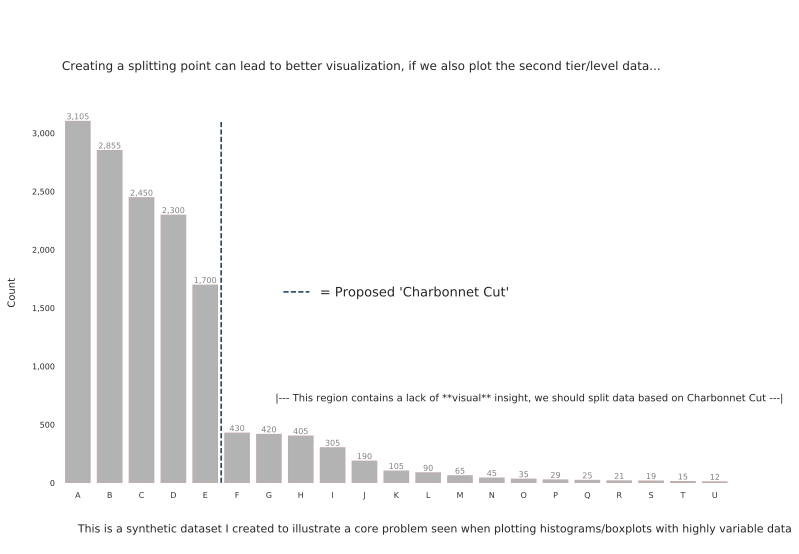

In [6]:

######################################################################### 
#                                                                       #
#   Creating an example visualization to illustrate the core problem    #
#                                                                       #
#########################################################################

# #Styling
# sns.set_context('paper')
# sns.set(font_scale=1)
# sns.set_style("white", {'grid.linestyle': '--'})
# plt.style.use('seaborn-white')

sns.set_style("white", {'grid.linestyle': '--'})


#Creating a synthetic dataset
synthetic_data   = [12,15,19,21,25,29,35,45,65,90,105,190,305,405,420,430,1700,2300,2450,2855,3105]
synthetic_points = ['U','T','S','R','Q','P','O','N','M','L','K','J','I','H','G','F','E','D','C','B','A']
     
#Creating core dataframe
mich24 = pd.DataFrame(synthetic_data,index=synthetic_points)
mich24.columns =['Count']
mich24 = mich24.sort_values(['Count'], ascending=False)
plt.figure(figsize=(12,7))

ax = sns.barplot(mich24.index, 
                 mich24.Count, 
                 color='gray', 
                 alpha=.6, 
                 linewidth=.1, 
                 edgecolor="red",
                 saturation=80)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="\n\n\n", ylabel='Count\n')
ax.set_xticklabels(mich24.index, color = 'black', alpha=.8)

for item in ax.get_xticklabels(): 
    item.set_rotation(0)
    
for i, v in enumerate(mich24["Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='gray', va ='bottom', rotation=0, ha='center')
    

ax.tick_params(axis='x', which='major', pad=9)    
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=True)  
#################################################plt.tight_layout()

plt.axvline(4.5, 0,0.95, linewidth=1.4, color="#00274C", label="= Proposed 'Charbonnet Cut'", linestyle="--")

plt.legend(loc='center', fontsize=13)

#  plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.text(0, -425, "\nThis is a synthetic dataset I created to illustrate a core problem seen when plotting histograms/boxplots with highly variable data", fontsize=11)

#Remove unnecessary chart junk   
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
# #sns.despine()

plt.title('\n\n\n\nCreating a splitting point can lead to better visualization, if we also plot the second tier/level data...''\n\n',fontsize=12, loc="left")    

plt.text(6.2,700,"|--- This region contains a lack of **visual** insight, we should split data based on Charbonnet Cut ---|", fontsize=10)

plt.show();



There is nothing wrong with keeping the original plot, but a subplot should be created for the area 'east' of the Cut, to see the RELATIONSHIP between the data points.   

I will now plot the datapoints east of the cut in its own subplot, for visualization clarity...

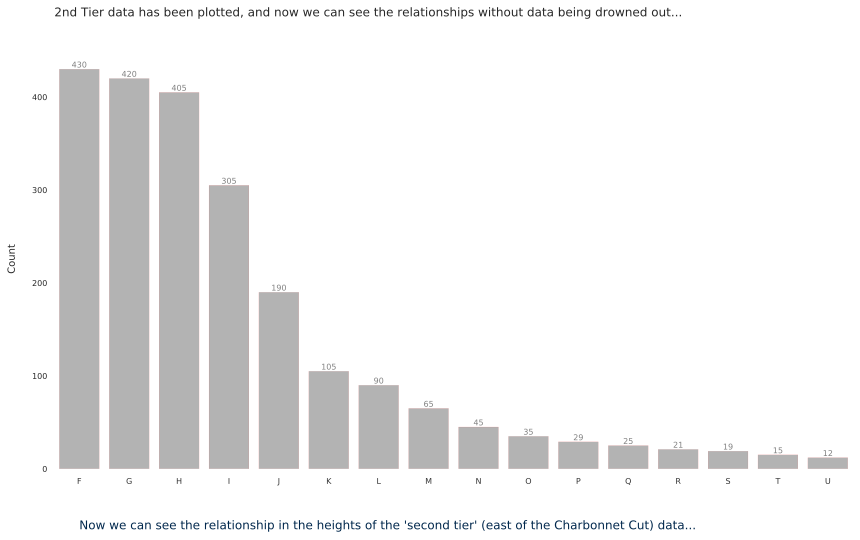

In [7]:

sns.set_style("white", {'grid.linestyle': '--'})

#Creating a synthetic dataset
synthetic_data   = [12,15,19,21,25,29,35,45,65,90,105,190,305,405,420,430]
synthetic_points = ['U','T','S','R','Q','P','O','N','M','L','K','J','I','H','G','F']
     
#Creating core dataframe
mich24 = pd.DataFrame(synthetic_data,index=synthetic_points)
mich24.columns =['Count']
mich24 = mich24.sort_values(['Count'], ascending=False)
plt.figure(figsize=(12,7))

ax = sns.barplot(mich24.index, 
                 mich24.Count, 
                 color='gray', 
                 alpha=.6, 
                 linewidth=.1, 
                 edgecolor="red",
                 saturation=80)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="\n\n\n", ylabel='Count\n')
ax.set_xticklabels(mich24.index, color = 'black', alpha=.8)

for item in ax.get_xticklabels(): 
    item.set_rotation(0)
    
for i, v in enumerate(mich24["Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='gray', va ='bottom', rotation=0, ha='center')
    

ax.tick_params(axis='x', which='major', pad=9)    
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=True)  
plt.tight_layout()

plt.legend(loc='center', fontsize=13)

#  plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.text(0, -65, "\nNow we can see the relationship in the heights of the 'second tier' (east of the Charbonnet Cut) data...", fontsize=12, color="#00274C")

#Remove unnecessary chart junk   
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
# #sns.despine()

plt.title('2nd Tier data has been plotted, and now we can see the relationships without data being drowned out...\n\n',fontsize=12, loc="left")    
plt.show();



**Concept Reference**  -  You will see [this guy](https://mgoblue.com/roster.aspx?rp_id=19098) in the NFL some day
  * Formulated during the viewing of [this](https://github.com/tombresee/Temp/raw/master/ENTER/michvsnd.png) game (there was some beer involved)

**Mark II Concept: (creating and in process)**

````
Maybe something like this:


seaborn.barplot(x=None, y=None, 
  !
  #--- create these option ---
  charbonnet=(bool Y|N) 
  charbonnet.method=(manual,auto)  
  #---------------------------
  !
  !
  !
  hue=None, data=None,                 
  order=None, hue_order=None, estimator=<function mean>, 
  ci=95, n_boot=1000, units=None, orient=None, 
  color=None, palette=None, etc etc.) 
                    

Notes:
 Based on algorithm *automatic* split of data into 'tier 1' 
 and 'tier 2' values, seaborn then plots Gridspec main barplot
 and also secondary tier 2 barplot to relay to viewer the 
 relationship in magnitude between values. Option for manual 
 cut value (x-val) would be supported as well. 
````

<br>

<div class="h4"><i>Let's now begin:  Initial Examination of overall running (rushing) yards per play:</i></div>
* Let's take a look at the most important feature, the yards, which we will need to be able to predict going forward after our machine learning model is created
    

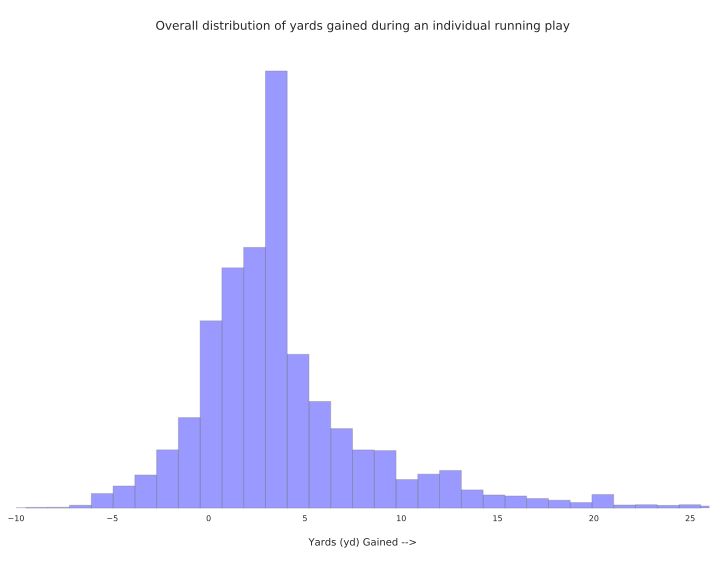

In [8]:
##sns.palplot(sns.color_palette("RdBu_r", 7))


tf = df.query("NflIdRusher == NflId")


sns.set_style("white", {'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(-10,26)

###ccc['colors'] = ['red' if x <= 0 else 'green' for x in ccc['Yards']]
###specialcolors = ['red' if x <= 0 else 'green' for x in tf.Yards]
c = [ 'r' if i < 0 else 'b' for i in tf.Yards]


sns.distplot(tf.Yards, kde=False, color='b', bins=100, 
            hist_kws={"linewidth": .9, 'edgecolor':'grey'})

#########################ax.set_xlim(80,100)

## Remove the x-tick labels:  plt.xticks([])
plt.yticks([])
## This method also hides the tick marks

plt.title('\nOverall distribution of yards gained during an individual running play\n',fontsize=12)
plt.xlabel('\nYards (yd) Gained -->\n')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()
##################plt.axvline(x=22, color='maroon', linestyle="--", linewidth=.5)
###############plt.text(22.8, 114, r'Median: 22 carries', {'color': 'maroon', 'fontsize': 9})
plt.tight_layout()
plt.show();


<div class="h4"><i>Visualizing yards gained and lost:</i></div>
* Let's create a clean simple visualization encompassing the gains and losses in a random set of games
* We will grab three random games, and plot the overall **run yards gained and lost** (assuming we combine both of the team's data to just get an idea of the ebb and flow of the plays, so if you see 40 plays, that means between both teams they run a total of 40 plays for instance. 
* The order is **chronological**, i.e. play 0 is the first play of the game, all the way to lets say play 41, which is the 40th run of the game, I don't differentiate between teams, we are just trying to get an idea of what we are dealing with here... 
* Zero-yard gains represented as missing bar, so look for 'skips' in the bars, that is a yardage = 0 scenario

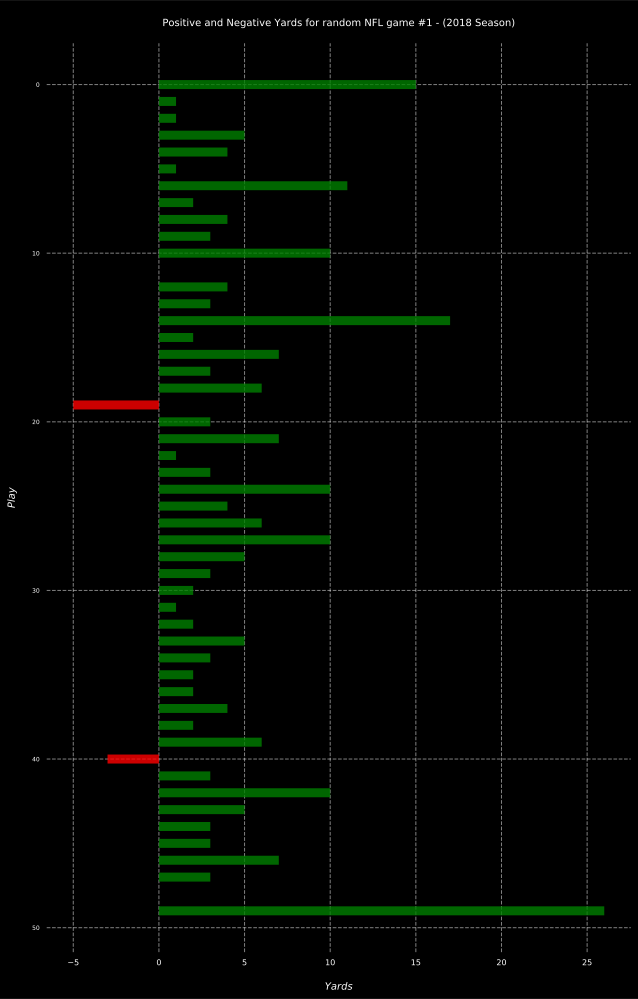

In [9]:
plt.style.use('dark_background')

#aaa is our temp df
aaa = gold
aaa['IsRunner'] = aaa.NflId == aaa.NflIdRusher
#bbb is now the unique run play runners in the year 2018 only
bbb = aaa[aaa.IsRunner & (aaa.Season == 2018)]
#ccc is now a specific actual game
ccc=bbb[bbb.GameId==2018121601] # we grab random game #1 
ccc = ccc[['Yards']][:]
ccc['colors'] = ['red' if x <= 0 else 'green' for x in ccc['Yards']]
##ccc.sort_values('Yards', inplace=True)
ccc.reset_index(inplace=True)
plt.figure(figsize=(9,14))
plt.hlines(y=ccc.index, xmin=0, xmax=ccc.Yards, color=ccc.colors, alpha=0.8, linewidth=9)
plt.gca().set(ylabel='$Play$\n', xlabel='\n$Yards$')
plt.yticks(fontsize=6)
plt.title('\nPositive and Negative Yards for random NFL game #1 - (2018 Season)\n', fontdict={'size':10})
plt.grid(linestyle='--', alpha=0.5)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show();


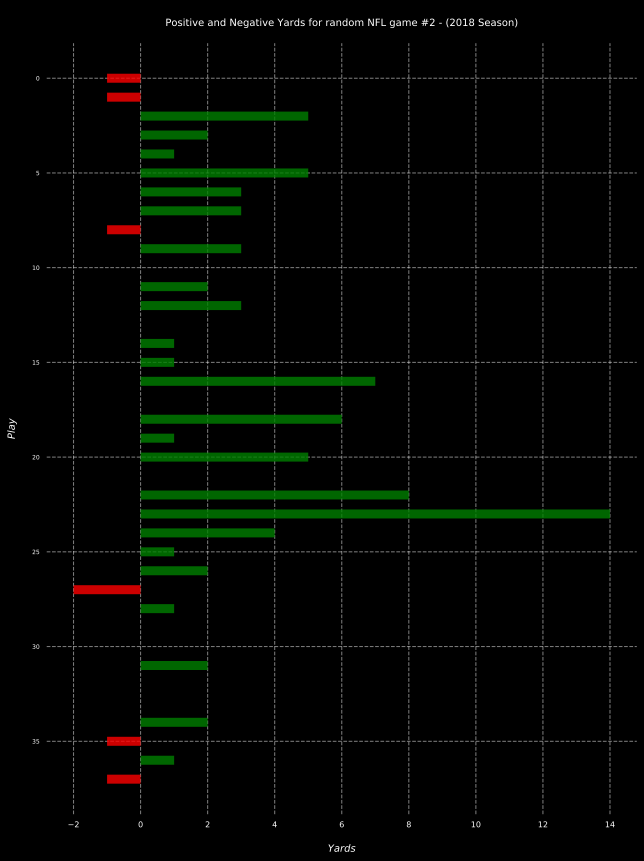

In [10]:
plt.style.use('dark_background')

ccc=bbb[bbb.GameId==2018121500]
ccc = ccc[['Yards']][:]
ccc['colors'] = ['red' if x <= 0 else 'green' for x in ccc['Yards']]
##ccc.sort_values('Yards', inplace=True)
ccc.reset_index(inplace=True)
plt.figure(figsize=(9,12), dpi= 300)
plt.hlines(y=ccc.index, xmin=0, xmax=ccc.Yards, color=ccc.colors, alpha=0.8, linewidth=9)
plt.gca().set(ylabel='$Play$\n', xlabel='\n$Yards$')
plt.yticks(fontsize=6)
plt.title('\nPositive and Negative Yards for random NFL game #2 - (2018 Season)\n', fontdict={'size':10})
plt.grid(linestyle='--', alpha=0.5)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show();

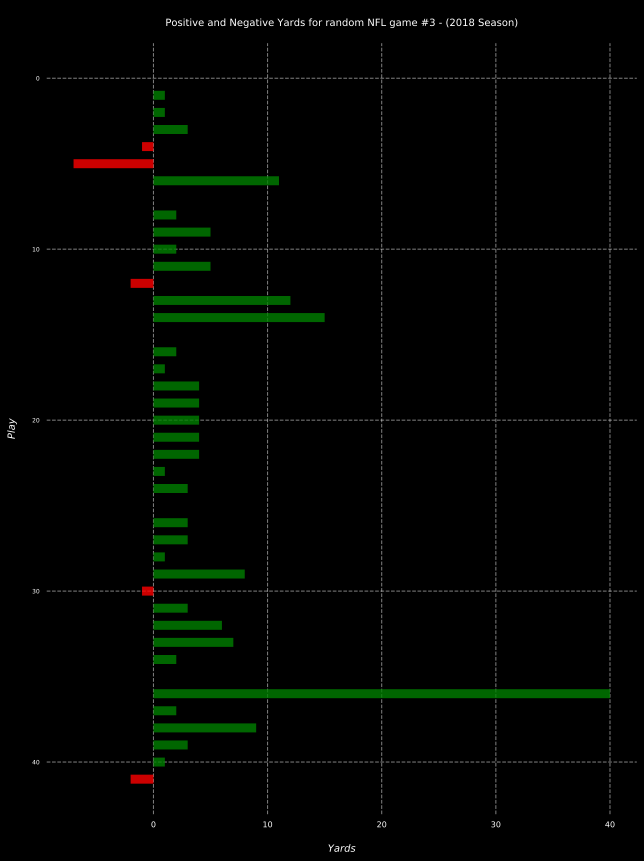

In [11]:
plt.style.use('dark_background')

ccc=bbb[bbb.GameId==2018121501]
ccc = ccc[['Yards']][:]
ccc['colors'] = ['red' if x <= 0 else 'green' for x in ccc['Yards']]
##ccc.sort_values('Yards', inplace=True)
ccc.reset_index(inplace=True)
plt.figure(figsize=(9,12), dpi= 300)
plt.hlines(y=ccc.index, xmin=0, xmax=ccc.Yards, color=ccc.colors, alpha=0.8, linewidth=9)
plt.gca().set(ylabel='$Play$\n', xlabel='\n$Yards$')
plt.yticks(fontsize=6)
plt.title('\nPositive and Negative Yards for random NFL game #3 - (2018 Season)\n', fontdict={'size':10})
plt.grid(linestyle='--', alpha=0.5)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show();

**What insights can we gain from the above plots ?**
* Game 1:
  * A **lot** of run plays (49 total plays combined from the two teams), with one run for over 25 yards (big gain), and a fair amount of longish runs.  Only two runs produced negative yards (one hurt, it was for a loss of 5 yards), so looks like the Offense on both teams is doing pretty good, with only two of the run play for zero-yards gained.  Good game to watch to see trends in running, we have a lot of sample points here.  And we can also analyze WHY there were so many long run plays, i.e. what defensive formation was being run in this game ?  This game was most likely a battle between two teams with strong runningbacks. 
* Game 2:
  * Longest run was for 14 yards, but very interesting:  **10** runs were zero-yard gain, **6** were negative gain, and in general I see very little yardage gained even when it was positive.  There is some **excellent**  defense going on in this game, it must have been a hardcore defensive battle...
* Game 3:
  * One very long run for 40 yards !  Let's think about this for a second:  If the offense runs lets say 20 run plays in a game, and most of them were for 2-4 yards, you can quickly see how devasting one run of 40 yards can be.  A good NFL rusher can gain 100 total yards in a game, but if one of those alone was for 40 yards, that is a BIG deal.  Here we see how guys like Walter Payton would have carved up defenses, with his long gains.  A nightmare to defend against.  And you can also see how a running back is worth his weight in gold, as he can change the outcome of a game with yardage gains.  
  * As a side note:  A good rule of thumb is that a pretty good running back is averaging over 4 yards per carry, and below that is 'ok'


In [12]:
# tf = df.query("NflIdRusher == NflId")


# sns.set_style("white", {'grid.linestyle': '--'})

# fig, ax = plt.subplots(figsize=(10,8))

# sns.distplot(tf.Yards, kde=False, color="b", 
#             hist_kws={"linewidth": .9, 'edgecolor':'steelblue'})

# #########################ax.set_xlim(80,100)

# ## Remove the x-tick labels:  plt.xticks([])
# plt.yticks([])
# ## This method also hides the tick marks


# plt.title('\nOverall distribution of yards gained during an individual running play\n',fontsize=12)
# plt.xlabel('\nYards (yd) Gained -->\n')
# sns.despine(top=True, right=True, left=True, bottom=True)
# plt.tight_layout()
# ##################plt.axvline(x=22, color='maroon', linestyle="--", linewidth=.5)

# ###############plt.text(22.8, 114, r'Median: 22 carries', {'color': 'maroon', 'fontsize': 9})





# # sns.set_style("white", {'grid.linestyle': '--'})

# # # sns.set_style("ticks", {'grid.linestyle': '--'})
# # ##sns.set(style="white", palette="muted", color_codes=True)
# # ##sns.set(style="white", palette="muted", color_codes=True)

# # ##t2 = tf.groupby(['GameId','Team'])['PlayId'].count()
# # ##t2 = pd.DataFrame(t2)

# # fig, ax = plt.subplots(figsize=(9,8))


# # sns.distplot(tf.Yards, kde=False, color="b", 
# #             hist_kws={"linewidth": .9, 'edgecolor':'lightgrey'}, bins=24)



# # # #~~~~~~~~~~~ ax.set ~~~~~~~~~~~~~~~~
# # # ##ax.set_xlim(0, 6)
# # # ##ax.set_ylim(0, 6)
# # # ax.set_title('Average yards gained as the season progresses (week by week)\n')
# # # ax.set(ylabel='Yards Gained\n')
# # # ax.set(xlabel='\nWeek Number (in the season)')
# # # ax.yaxis.grid(True)   # Show the horizontal gridlines
# # # ax.xaxis.grid(False)  # Hide x-axis gridlines 
# # # # ax.yaxis.set_major_locator(plt.MultipleLocator(1))
# # # # ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
# # # #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# # ## Remove the x-tick labels:  plt.xticks([])
# # plt.yticks([])
# # ## This method also hides the tick marks
# # plt.title('\nDistribution of total number of run plays on a game basis (per team)\n',
# #           fontsize=12, loc="left")
# # plt.title('\nDistribution of total number of run plays on a game basis (per team)\n',fontsize=12, loc="left")
# # plt.xlabel('\nNumber of times the ball was run in the game\n')
# # sns.despine(top=True, right=True, left=True, bottom=True)
# # plt.tight_layout()
# plt.axvline(x=22, color='maroon', linestyle="--", linewidth=.5)

# plt.text(22.8, 114, r'Median: 22 carries', {'color': 'maroon', 'fontsize': 9})

# plt.tight_layout()
# plt.show();





# tf = df.query("NflIdRusher == NflId")


# sns.set_style("white", {'grid.linestyle': '--'})

# fig, ax = plt.subplots(figsize=(10,8))
# ax.set_xlim(-10,26)


# sns.distplot(tf.Yards, kde=False, color="b", bins=100,
#             hist_kws={"linewidth": .9, 'edgecolor':'grey'})

# #########################ax.set_xlim(80,100)

# ## Remove the x-tick labels:  plt.xticks([])
# plt.yticks([])
# ## This method also hides the tick marks


# plt.title('\nOverall distribution of yards gained during an individual running play\n',fontsize=12)
# plt.xlabel('\nYards (yd) Gained -->\n')
# sns.despine(top=True, right=True, left=True, bottom=True)
# plt.tight_layout()
# ##################plt.axvline(x=22, color='maroon', linestyle="--", linewidth=.5)

# ###############plt.text(22.8, 114, r'Median: 22 carries', {'color': 'maroon', 'fontsize': 9})
# plt.tight_layout()
# plt.show();

# # tf.Yards.describe()

<div class="h4"><i>Yards vs Down:</i></div>
* Plotting the distribution of yards by series 'Down'.  Note that I have configured many of my plots to show granular ultra-precise 1-yard increments ! 
    

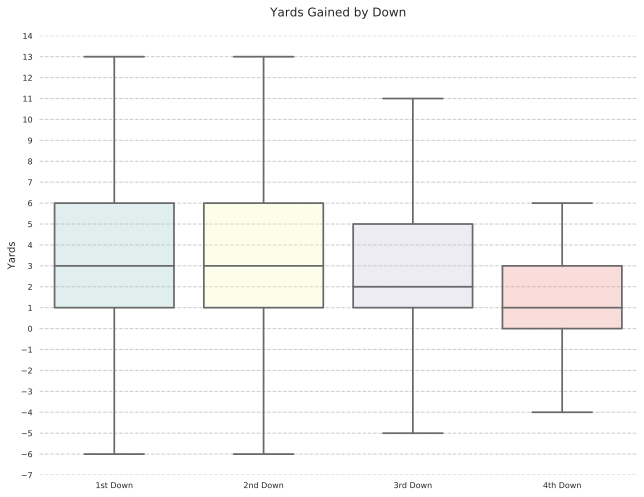

In [13]:

tf = df.query("NflIdRusher == NflId")
sns.set_style("ticks", {'grid.linestyle': '--'})
######sns.set_style("ticks", {"xtick.major.size":1,"ytick.major.size":1})
flierprops = dict(markerfacecolor='0.75', 
                  markersize=1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(9,7))

ax.set_ylim(-7, 14)
ax.set_title('Yards Gained by Down\n', fontsize=12)

sns.boxplot(x='Down',
            y='Yards',
            data=tf,
            ax=ax,
            showfliers=False , 
            #color='blue'
            )
            #flierprops=flierprops)
    
#Completely hide tick markers...
# ax.yaxis.set_major_locator(plt.NullLocator())
# ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 

ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))


# Add transparency to colors
for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .3))
    
    
##ax.legend(frameon=False)

# ax.set(xlabel=''common xlabel', ylabel='common ylabel', title='some title')

ax.set(xlabel='')
ax.set_xticklabels(['1st Down', '2nd Down', '3rd Down', '4th Down'])
plt.tight_layout(); plt.show();

<div class="h4"><i>Yards vs Quarter of the Game:</i></div>
* Plotting the distribution of yards by game quarter, where 5Q symbolizes overtime...

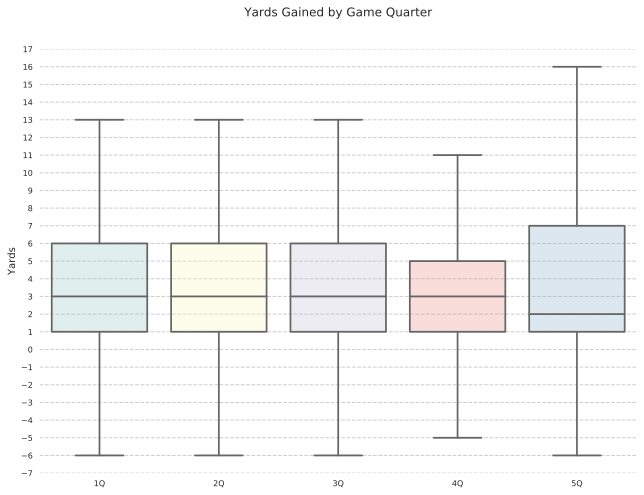

In [14]:
tf = df.query("NflIdRusher == NflId")
flierprops = dict(markerfacecolor='0.75', 
                  markersize=1,
                  linestyle='none')
fig, ax = plt.subplots(figsize=(9,7))
ax.set_ylim(-7, 17)
ax.set_title('Yards Gained by Game Quarter\n\n', fontsize=12)

sns.boxplot(x='Quarter',
            y='Yards',
            data=tf,
            ax=ax,
            showfliers=False , 
            #color='blue'
            )
            #flierprops=flierprops)
    
#Completely hide tick markers...
# ax.yaxis.set_major_locator(plt.NullLocator())
# ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 

ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

# Add transparency to colors
for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .3))
    
# ax.set(xlabel=''common xlabel', ylabel='common ylabel', title='some title')
ax.set(xlabel='')
ax.set_xticklabels(['1Q', '2Q', '3Q', '4Q', '5Q'])
plt.tight_layout(); plt.show();


<div class="h4"><i>Yards Gained vs Box Defender Count:</i></div>
* Plotting the distribution of yards gained vs number of defenders in the box.  We will call this the defensive 'density' count...

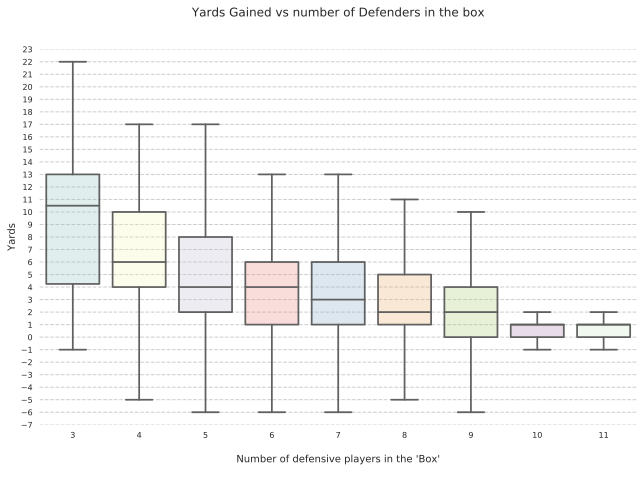

In [15]:
dff = tf[tf.DefendersInTheBox>2]
dff.DefendersInTheBox = dff.DefendersInTheBox.astype('int')

flierprops = dict(markerfacecolor='0.75', 
                  markersize=1,
                  linestyle='none')

fig, ax = plt.subplots(figsize=(9,7))
ax.set_ylim(-7, 23)
ax.set_title('Yards Gained vs number of Defenders in the box\n\n', fontsize=12)
sns.boxplot(x='DefendersInTheBox',
            y='Yards',
            data=dff,
            ax=ax,
            showfliers=False , 
            #color='blue'
            )
            #flierprops=flierprops)
#Completely hide tick markers...
# ax.yaxis.set_major_locator(plt.NullLocator())
# ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 

ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

# Add transparency to colors
for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .3))
    
# ax.set(xlabel=''common xlabel', ylabel='common ylabel', title='some title')
ax.set(xlabel="\nNumber of defensive players in the 'Box'\n\n")
# ax.set_xticklabels(['1Q', '2Q', '3Q', '4Q', '5Q'])

# plt.title('My subtitle',fontsize=16)
# plt.suptitle('My title',fontsize=24, x=0, y=1,ha="left")
# plt.text(x=4.7, y=4.7, s='Sepal Length vs Width', fontsize=16, weight='bold')
# plt.text(x=4.7, y=4.6, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75)

plt.tight_layout()
plt.show();


* When there are nine defensive players in the box, 25% of the runs gained LESS than 0 yards, and half the runs were for LESS than 2 yards. 
* It is very rare for defenses to line up with four or less players, but when they do, the Offense seems to gain a fair amount of yards.

<div class="h4"><i>Yards gained average vs season week number:</i></div>
* Plotting average yards gained per play, on a week by week basis as the season transpires.  

In [16]:

#MDK

# # sns.set(style="white", palette="muted", color_codes=True)
# sns.set_style("ticks", {'grid.linestyle': '--'})


# t = tf[['Week', "Yards"]].groupby('Week').mean().sort_values(by = "Yards")
# ###sns.set_style("white", {'grid.linestyle': '--'})
# fig, ax = plt.subplots(figsize=(8,7))

# sns.barplot(x=t.index,
#             y=t.Yards,
#             ax=ax, 
#             linewidth=.5, 
#             facecolor=(1, 1, 1, 0),
#             errcolor=".2", 
#             edgecolor=".2")

        
# # for patch in ax.artists:
# #     r, g, b, a = patch.get_facecolor()
# #     patch.set_facecolor((r, g, b, .1))
    
# #~~~~~~~~~~~ ax.set ~~~~~~~~~~~~~~~~
# ##ax.set_xlim(0, 6)
# ax.set_ylim(2, 6)
# ax.set_title('Average yards gained per play as the season progresses (week by week)\n', fontsize=12)
# ax.set(ylabel='Yards Gained\n')
# ax.set(xlabel='\nWeek Number (in the season)')
# ax.yaxis.grid(True)   # Show the horizontal gridlines
# ax.xaxis.grid(False)  # Hide x-axis gridlines 
# ax.yaxis.set_major_locator(plt.MultipleLocator(1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

# plt.tight_layout()
# plt.show();



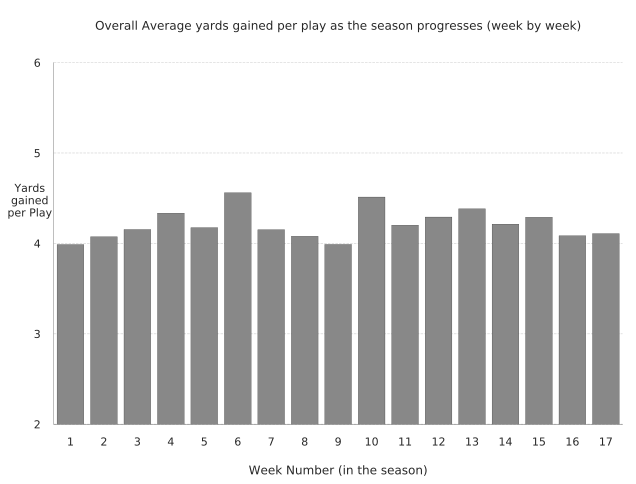

In [17]:

sns.set(style="white", palette="muted", color_codes=True)

#sns.set_style("ticks", {'grid.linestyle': '--'})
# # this may not work right
# sns.set_style({'grid.linestyle': '--'}, )

t = tf[['Week', "Yards"]].groupby('Week').mean().sort_values(by = "Yards")
###sns.set_style("white", {'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9,7))

sns.barplot(x=t.index,
            y=t.Yards,
            ax=ax, 
            linewidth=.2, 
            #color='red'
            facecolor='#888888',
            #facecolor=(1, 1, 1, 0),
            #errcolor=".2",
            edgecolor="black")


        
    
#~~~~~~~~~~~ ax.set ~~~~~~~~~~~~~~~~
##ax.set_xlim(0, 6)
ax.set_ylim(2, 6)
ax.set_title('\nOverall Average yards gained per play as the season progresses (week by week)\n\n', fontsize=12)
# ax.set(ylabel='Yards Gained\n', rotation='horizontal')
ax.set(xlabel='\nWeek Number (in the season)')
ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(False)  # Hide x-axis gridlines 
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

#-----more control-----#
ax.grid(linestyle='--', 
        linewidth='0.7', 
        color='lightgray', 
        alpha=0.9,
        axis='y'
       )

# Don't allow the axis to be on top of your data
# ax.set_axisbelow(True)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
ax.spines['top'].set_linewidth(0)  
ax.spines['left'].set_linewidth(.3)  
ax.spines['right'].set_linewidth(0)  
ax.spines['bottom'].set_linewidth(.3) 

plt.ylabel("Yards\ngained\nper Play\n\n", fontsize=11, rotation=0)


plt.tight_layout()
plt.show();


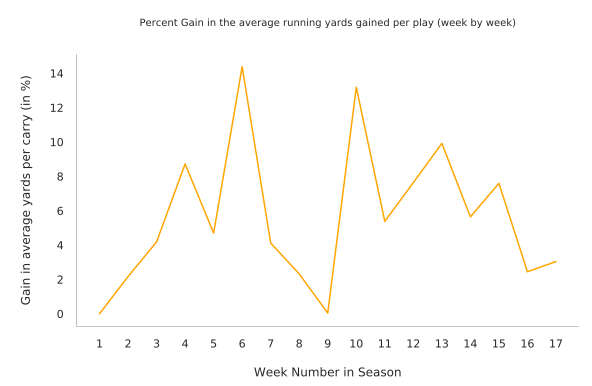

In [18]:
t = tf[['Week', "Yards"]].groupby('Week').mean().sort_values(by = "Yards")
t['WeekInSeason']= t.index
t.reset_index(drop=True, inplace=True)
starter= t.loc[0,'Yards']
t['gain']=t.Yards/starter
t['gainpct']=round(100*(t.gain-1), 3)


fig, ax = plt.subplots(figsize=(9,5))


sns.lineplot(x="WeekInSeason", y="gainpct", data=t, 
            color='orange', ax=ax, markers=True); 

ax.set_title('\nPercent Gain in the average running yards gained per play (week by week)\n\n', fontsize=10)

# ax.xaxis.set_major_locator(plt.MultipleLocator(13))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.set(ylabel='\nGain in average yards per carry (in %)\n')

ax.set(xlabel='\nWeek Number in Season')

ax.spines['top'].set_linewidth(0)  
ax.spines['left'].set_linewidth(.3)  
ax.spines['right'].set_linewidth(0)  
ax.spines['bottom'].set_linewidth(.3); 



* Our baseline is week 1, and then from there, we compare where the run game is at week by week to that baseline, i.e. if in week 5 the average yards/carry is 10% more compared to week 1 game, then we graph that value in the plot...
* Progress:
  * It appears in the first month of the season, there is a strong climb in runner performance.  By week 6, the runners are peaking in terms of productivity.  Potential fatigue factor kicks in two months into the season, then strong push for the second half of the season as the teams are getting stronger and stronger, making a run towards the playoffs.  

<div class="h4"><i>Number of run plays called per NFL game per team:</i></div>
* Histogram plot of the total number of run plays called per game per season.  
* This takes into consideration every game played, where each team takes turns calling run plays (and contains both 2017 and 2018 data)


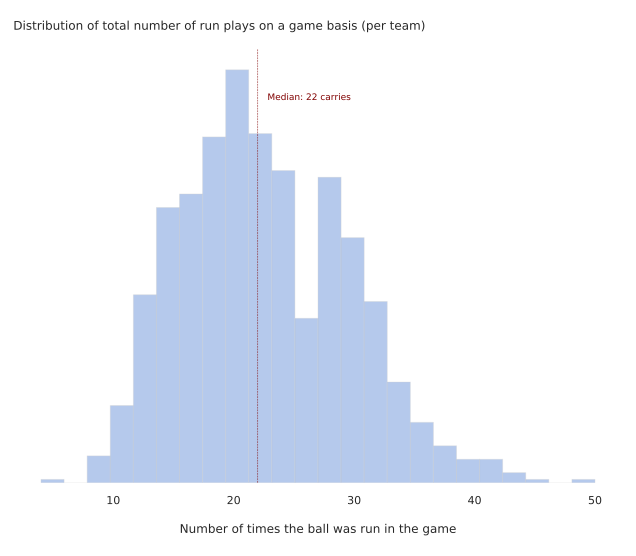

In [19]:
sns.set_style("white", {'grid.linestyle': '--'})

# sns.set_style("ticks", {'grid.linestyle': '--'})
##sns.set(style="white", palette="muted", color_codes=True)
##sns.set(style="white", palette="muted", color_codes=True)

t2 = tf.groupby(['GameId','Team'])['PlayId'].count()
t2 = pd.DataFrame(t2)

fig, ax = plt.subplots(figsize=(9,8))


sns.distplot(t2.PlayId, kde=False, color="b", 
            hist_kws={"linewidth": .9, 'edgecolor':'lightgrey'}, bins=24)



# #~~~~~~~~~~~ ax.set ~~~~~~~~~~~~~~~~
# ##ax.set_xlim(0, 6)
# ##ax.set_ylim(0, 6)
# ax.set_title('Average yards gained as the season progresses (week by week)\n')
# ax.set(ylabel='Yards Gained\n')
# ax.set(xlabel='\nWeek Number (in the season)')
# ax.yaxis.grid(True)   # Show the horizontal gridlines
# ax.xaxis.grid(False)  # Hide x-axis gridlines 
# # ax.yaxis.set_major_locator(plt.MultipleLocator(1))
# # ax.yaxis.set_minor_locator(plt.MultipleLocator(5))
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Remove the x-tick labels:  plt.xticks([])
plt.yticks([])
## This method also hides the tick marks
plt.title('\nDistribution of total number of run plays on a game basis (per team)\n',
          fontsize=12, loc="left")
plt.title('\nDistribution of total number of run plays on a game basis (per team)\n',fontsize=12, loc="left")
plt.xlabel('\nNumber of times the ball was run in the game\n')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()
plt.axvline(x=22, color='maroon', linestyle="--", linewidth=.5)

plt.text(22.8, 114, r'Median: 22 carries', {'color': 'maroon', 'fontsize': 9})

plt.tight_layout()
plt.show();


* The median number of times there is a run play per team in a game is 22, i.e. if a single running back was used, he would be running roughly 22 plays per game, but there is a fairly wide variation here from 10 up to about 40 plays in a game.  30 is considered a fair number of plays for a running back, beyond 40 is considered *extreme* for a single player...
* Distribution appears to be bi-modal, where there is a peak at 20 and a peak at about 28 carries.  One could argue this could even be the difference between teams that run the ball a fair amount (as part of their offensive strategy), and those that choose to prefer the pass with a balance of some running plays to keep the defense off guard...
* This does bring up the fact that to play in the NFL, as a premier running back you will be getting the ball many times, and **durability** becomes a major factor as the season goes on ! 

Diving Deeper:  

The below plot is an exact count visualization of the number of run plays that occurred in a game, specifically in the entire 2018 season 
* By using the swarmplot, we see the precise distribution - and this gives a better representation of the distribution of values (where 1:1 viz, i.e. one dot is one game that had a specific count of run plays)
* We also can **quickly** see the second, third, and fourth most run play count in a random game

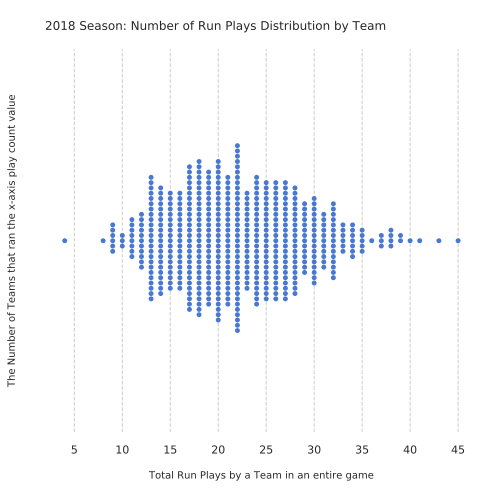

In [20]:
#number_plays_2018 = bbb.groupby(['GameId'], as_index=False).agg({'PlayId': 'nunique'})
number_plays_2018_perteam = bbb.groupby(['GameId', 'Team'], as_index=False).agg({'PlayId': 'nunique'})

sns.set_style("white", {'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(7,7))

#Completely hide tick markers...
# ax.yaxis.set_major_locator(plt.NullLocator())
# ax.xaxis.set_major_formatter(plt.NullFormatter())

#ax.yaxis.grid(True)   # Show the horizontal gridlines
ax.xaxis.grid(True)  # Hide x-axis gridlines 

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(5))


sns.swarmplot(number_plays_2018_perteam.PlayId, color="b", ax=ax)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.ylabel('The Number of Teams that ran the x-axis play count value\n', fontsize=10)

plt.xlabel('\nTotal Run Plays by a Team in an entire game', fontsize=10)
plt.title('\n2018 Season: Number of Run Plays Distribution by Team\n',fontsize=12, loc="left")


# - - - - - - - - 
plt.tight_layout()
plt.show();


# Add transparency to colors
# for patch in ax.artists:
#   r, g, b, a = patch.get_facecolor()
#   patch.set_facecolor((r, g, b, .3))



* What we find interesting is the peaks are not **that** pronouced though, i.e. there are many teams that will run the ball 17, 18, 19, 20, up to 22 times in a single game, and also a fair amount of teams that will run the ball 24, 25, 26, up to 27 times in a single game...
* It should be noted that this is an intriguing factor:
  * In a single game, there are not a tremendous number of run plays either way, meaning our sample size per team per game of run plays is somewhat limited, so deriving a predictive model will contain many factors with a number of samples that is relatively small, offering a challenge...

Continuing Analysis:


<br>

<div class="h4"><i>Total Rushing Yards per NFL Team:</i></div>
* The following shows the total run yards per team, over the course of two individual seasons.  
* I specifically use the total over two years to show the effect the running game can have on a team's performance.  I will eventually plot the yards on a per game average basiss, but but the point here is to show the vast amount of offensive yards that the top teams had over the others.  
* The New England Patriots won the 2018 season superbowl (against the LA Rams).  I believe the running offense was a major factor in that. 
* **Note:** I include a new plotting term called **`icicles`** to enhance the visualization of barplots.  Using `icicles`, one can not clutter the plot excessively but still relay x-axis values superimposed onto the chart.  Thus it is not necessary to cover the entire plot with a grid, but rather only the section that specifically needs it and where it is pertinent.  
  * *This term does not currently exist in mainstream visualization, I'm creating it.*

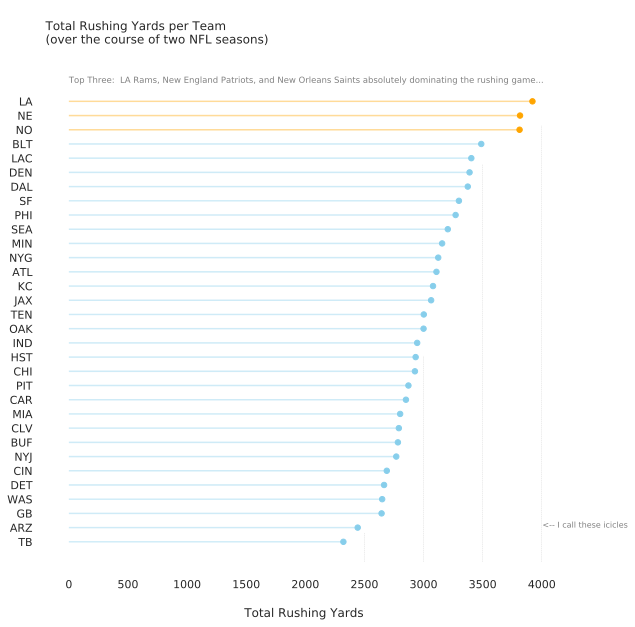

In [21]:
df04 = tf.groupby('PossessionTeam')['Yards'].agg(sum).sort_values(ascending=True)
df04 = pd.DataFrame(df04)
df04['group'] = df04.index

my_range=range(1,33)

fig, ax = plt.subplots(figsize=(9,9))

# Create a color if the group is "B"
##my_color=np.where(df04['group']=='NE', 'orange', 'skyblue')

##my_color=np.where(df04[  ('group'=='NE') | ('group'=='NO')  ], 'orange', 'skyblue')

my_color=np.where( (df04.group == 'NE') | (df04.group == 'NO') | (df04.group == 'LA') , 'orange', 'skyblue')

##movies[(movies.duration >= 200) | (movies.genre == 'Drama')]
##df04[(df04.group == 'NE') | (df04.group == 'NO') ]
##(movies.duration >= 200) & (movies.genre == 'Drama')

my_size=np.where(df04['group']=='B', 70, 30)
 
plt.hlines(y=my_range, xmin=0, xmax=df04['Yards'], color=my_color, alpha=0.4)
plt.scatter(df04.Yards, my_range, color=my_color, s=my_size, alpha=1)
 
# Add title and exis names
plt.yticks(my_range, df04.group)
plt.title("\nTotal Rushing Yards per Team \n(over the course of two NFL seasons)\n\n", loc='left', fontsize=12)
plt.xlabel('\n Total Rushing Yards')
plt.ylabel('')
##############plt.ylabel('NFL\nTeam\n')

ax.spines['top'].set_linewidth(.3)  
ax.spines['left'].set_linewidth(.3)  
ax.spines['right'].set_linewidth(.3)  
ax.spines['bottom'].set_linewidth(.3)  

plt.text(0, 33.3, r'Top Three:  LA Rams, New England Patriots, and New Orleans Saints absolutely dominating the rushing game...', {'color': 'grey', 'fontsize': 8.5})
sns.despine(top=True, right=True, left=True, bottom=True)

plt.text(4005, 2, '<-- I call these icicles', {'color': 'grey', 'fontsize': 8})

plt.axvline(x=3500, color='lightgrey', ymin = .01, ymax=.82, linestyle="--", linewidth=.4)
plt.axvline(x=4000, color='lightgrey', ymin = .01, ymax=.9, linestyle="--", linewidth=.4)
plt.axvline(x=3000, color='lightgrey', ymin = .01, ymax=.43, linestyle="--", linewidth=.4)
plt.axvline(x=2500, color='lightgrey', ymin = .01, ymax=.07, linestyle="--", linewidth=.4)

plt.tight_layout()
plt.show();


<hr>

<div class="h2"><i>Particle (Player) Physics</i></div>
<br>
<div class="h4"><i>Towards a deeper understanding of the game of football in relation to Newtonian Physics</i></div>


* I'm going to start drinking and the answer is just going to come to me, here we go

<div class="h4"><i>Core Assumptions:</i></div>
* list out...

It should be noted that both the Force `F` and the acceleration `a` are both technically vectors, and that the mass `m` is a 'scalar'.  

$$\mathbf{\vec F} = m\;\mathbf{\vec a}$$

$$\mathbf{\vec a} = \frac{\mathbf{\vec F}}{m}$$

In standard mathematics, vectors either have the arrow over the vector, OR the letter is just bolded, we will stick with the bold technique, but you get the point...

$$\mathbf{F} = m\;\mathbf{a}$$

i.e. in our case: 

$$\mathbf{F}_{player} = m\;\mathbf{a}_{player}$$

The weight of an object is the force of gravity on the object and may be defined as the mass times the acceleration of gravity (commonly referred to as the scalar value $g$ )

We will focus on the 2018 Season exclusively for this analysis. 

<div class="h4"><i>Weight Distribution:</i></div>
* Let's dive into examining player weight information 


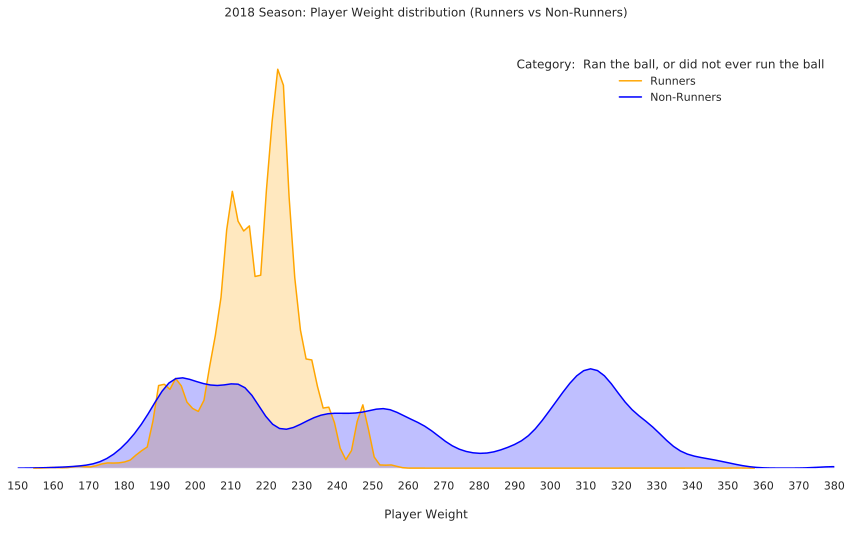

In [22]:

aaa = gold
aaa['IsRunner'] = aaa.NflId == aaa.NflIdRusher
bbb = aaa[aaa.IsRunner & (aaa.Season == 2018)]


fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(150,380)
ax.set_title('2018 Season: Player Weight distribution (Runners vs Non-Runners)\n\n', fontsize=12)

sns.kdeplot(bbb.PlayerWeight, shade=True, color="orange", ax=ax)
sns.kdeplot(aaa[~aaa.IsRunner & (aaa.Season == 2018)].PlayerWeight, shade=True, color='blue', ax=ax)

ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))

# Add transparency to colors
for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .3))
    
    
####plt.text(x=4.7, y=4.7, s='Sepal Length vs Width', fontsize=16, weight='bold')
# plt.text(x=4.7, y=4.6, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75)
sns.despine(top=True, right=True, left=True, bottom=True)

# Turn off tick labels
ax.set_yticklabels([])
#ax.set_xticklabels([])


ax.set(xlabel="\nPlayer Weight\n\n")
plt.legend(title='Category:  Ran the ball, or did not ever run the ball', loc='upper right', labels=['Runners', 'Non-Runners'])
plt.tight_layout()
plt.show();


**Read very carefully:**
* I specifically am *not* looking at the unique player distribution here and plotting their weights.  That is not what I am doing here.  I am gathering up the total number of running plays of all of the combined teams over the entire 2018 seasons, and I am creating a distribution of the weight of the runner who made the play (in orange), and also during those SAME plays, gathering up the weight distribution of those who did NOT run the ball.  I believe this thus gives us a very good idea of the weights of the players that were **on** the field during the season (broken out by rushing player versus non-rushing player), and starts to paint a picture of being able to predict the expected yards gained during running plays. 
  * I care about **who** is on the playing field here, that is the key for future prediction models. 
  * As long as the weights of the players are updated throughout the season, this also is an extremely granular way of determining kinetic energy on the field as well.
  * I guess my real point is this - if they aren't on the field, or aren't on the field much, do I really care what their weight is when i figure out my model ? 
* Thus, of those that ran the ball in the 2018 NFL season, they had an average weight of **217 lbs**, and a median weight of 220 lbs. 
* Non-Runners had a pretty wide distribution, obviously depends on position they played...
  * There is a pronounced peak at 310lbs, which is our linemen...

<div class="h4"><i>Player Profile - Mass:</i></div>
* Let's take a look at the weight distribution now for every player in the 2018 NFL season.  This time we will just examine all players who played in the season and were on the roster, to get a ballpark on some differences in weight vs position:

In [23]:
#
#Creating a playah profile, as a reference df:
#
#
player_profile=aaa.loc[:,['DisplayName','Position','NflId' 'PlayerBirthDate', 'PlayerWeight', 'PlayerCollegeName']].drop_duplicates()
player_profile_2018=aaa[aaa.Season==2018]
player_profile_2018 = player_profile_2018.loc[: ,['DisplayName','Position','NflId' 'PlayerBirthDate', 'PlayerWeight', 'PlayerCollegeName'] ].drop_duplicates()
#
#
# len(player_profile)
# len(player_profile_2018)
#
#
#
player_profile_2018["kg"] = player_profile_2018["PlayerWeight"] * 0.45359237
#
#
##player_profile_2018.PlayerCollegeName.value_counts()
#
#
z = player_profile_2018.groupby('Position')['PlayerWeight'].agg(['min', 'median', 'mean', 'max']).round(1).sort_values(by=['median'], 
                                                                                                                   ascending=False)
z['Avg Mass (kg)'] = (z['mean'] * 0.45359237).round(1)
z

min  median   mean  max  Avg Mass (kg)
Position                                        
T         288   316.5  317.4  380          144.0
NT        290   315.0  315.2  346          143.0
OT        300   315.0  317.1  345          143.8
G         290   314.5  314.3  340          142.6
OG        298   310.0  316.6  342          143.6
C         290   306.5  307.0  325          139.3
DT        261   306.0  308.3  352          139.8
DE        240   271.0  274.3  341          124.4
TE        220   254.0  253.4  280          114.9
OLB       215   245.5  246.6  285          111.9
FB        233   240.0  244.2  311          110.8
MLB       227   238.5  239.7  260          108.7
LB        214   238.0  240.5  285          109.1
ILB       211   237.0  236.9  257          107.5
DL        235   235.0  235.0  235          106.6
QB        202   224.5  224.2  245          101.7
HB        200   219.5  218.7  240           99.2
RB        185   215.0  215.4  255           97.7
SS        186   208.0  207.3  223           94.0
FS        185   205.0  204.6  227           92.8
S         194   204.0  205.1  217           93.0
WR        160   202.0  200.5  245           90.9
DB        180   200.0  201.3  224           91.3
CB        159   193.0  194.1  218           88.0

* I like this view (in order of descending median weight, by position).  You immediately see that all of the linemen are just over 300lbs. And they make up a LARGE distribution of the players on the field, i.e. there are some BIG BOYS on that field.  
* I find it suprising that FB (fullbacks) are as heavy as they are.  I would imagine one could argue that two things are pretty critical to determining the performance of a running back: 
  * How big are the offensive linemen ???  (ideally we knew how strong they were as well, but no information contained about that)
  * How big is the fullback ?  A fullback with some size would really help blocking for the running back and I believe would be directly proportional to the success of the runningback.  
  * Look at how large the OTs (offensive tackles) are.  One would imagine a run off the OT being a smart play, IF the defensive linebacker at that area was smaller as well...

In [24]:

# ####dfv = gold.loc[:,['NflId', 'DisplayName', 'PlayerBirthDate', 'PlayerWeight', 'PlayerHeight']].drop_duplicates()
# #
# #
# #
# #Plot
# sns.distplot(bbb, kde=False, color="b", 
#             hist_kws={"linewidth": .9, 'edgecolor':'lightgrey'}, bins=24)
# #
# #
# #
# #
# fig, ax = plt.subplots(figsize=(12, 8))
# #
# ax.set_xlim(150,380)
# ax.set_title('2018 Season: Player Weight distribution (Runners vs Non-Runners)\n\n', fontsize=12)


# sns.kdeplot(bbb.PlayerWeight, shade=True, color="orange", ax=ax)
# sns.kdeplot(aaa[~aaa.IsRunner & (aaa.Season == 2018)].PlayerWeight, shade=True, color='blue', ax=ax)

# ax.xaxis.set_major_locator(plt.MultipleLocator(10))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(5))

# # Add transparency to colors
# for patch in ax.artists:
#   r, g, b, a = patch.get_facecolor()
#   patch.set_facecolor((r, g, b, .3))
    
    
# ####plt.text(x=4.7, y=4.7, s='Sepal Length vs Width', fontsize=16, weight='bold')
# # plt.text(x=4.7, y=4.6, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75)
# sns.despine(top=True, right=True, left=True, bottom=True)

# # Turn off tick labels
# ax.set_yticklabels([])
# #ax.set_xticklabels([])


# ax.set(xlabel="\nPlayer Weight\n\n")
# plt.legend(title='Category:  Ran the ball, or did not ever run the ball', loc='upper right', labels=['Runners', 'Non-Runners'])
# plt.tight_layout()
# plt.show();

<div class="h4"><i>Collisions:</i></div>
* Collisions between dynamic bodies can either be elastic or inelastic
* We will defined an `angle of attack`, similar to airfoil design.  This angle of attack will be the angle at which contact is made from the defender onto the offensive runningback.  We will then able able to also break out momentum and force into components with one common reference frame
  * Assumption is that runner is running from left to right m
* Every runningback should PREFER inelastic collisions !  
  * Why ? **Because it creates the separation that is their advantage**
  * How ? Ideally with an alpha less than 45 degrees - this way they bounce off and keep going somewhat in the x-axis direction, but ideally it is not an inelastic collision with alpha of 0 or near it, that is going to completely stop runningback momentum
  * Effectively a runningback wants to maneuver, and when maeuvering is no longer much of an option, to 'bounce' off the tackler


<table><tr>

<td> <img src="https://github.com/tombresee/Temp/raw/master/ENTER/contact.png" width="800px"> </td>


</tr></table>

Why is it so important to analyze the governing dynamics ? 
  * Check out this *2016 NFL Combine Report* on Dallas Cowboy runningback Ezekiel Elliott
  * Source: `http://www.nfl.com/player/ezekielelliott/2555224/combine`
<br>
<img src="https://github.com/tombresee/Temp/raw/master/ENTER/elliott.png" width="800px">
* i.e. the key to running effectively I believe is contained within the specific verbage above, these are some key factors for producing actual yards... 


<br>

<div class="h4"><i>How to stop a truck:</i></div>
* Americans are terrible with the metric system.  Its unexplainable. 
* Think a lb is about two kg.  In other words, if someone told you they weighed 100lbs, they are about 50kg (although technically 45.359 kg)
  * So think:  When I have pounds, take about 45% of that value, and now you have kg
* Lets convert all the weight values of runners to kg:

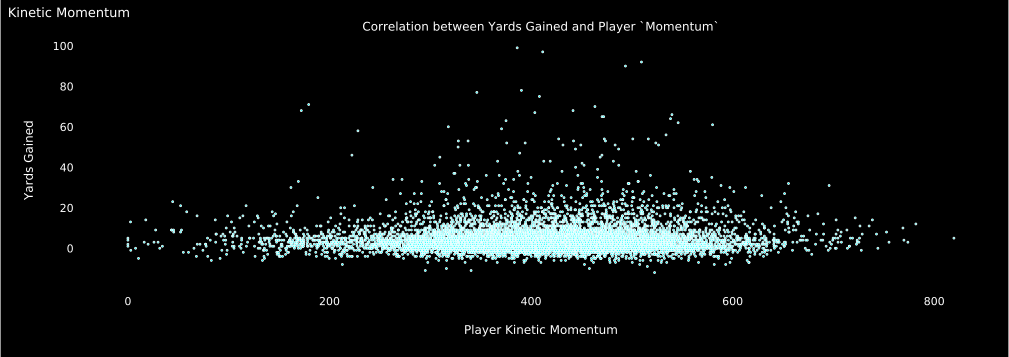

In [25]:
# bbb.Position.value_counts()
# RB    10476
# WR      372
# HB      327
# QB       40
# FB       35
# TE       16
# CB        3
# DE        1
# DT        1
#---------------------------
#10476/11271=93%
#---------------------------


plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14,5))



ttt = bbb[bbb.Position.isin(['RB','WR','HB'])]

ttt['kg']=ttt["PlayerWeight"] * 0.45359237
ttt['Force_Newtons']=ttt['kg'] * ttt['S'] * 0.9144
tips = ttt[['Force_Newtons', 'Yards']]

sns.scatterplot(x="Force_Newtons", y="Yards", data=tips, s=4, ax=ax, color='cyan', markers='.', edgecolors='cyan')
##sns.lmplot(x="Force_Newtons", y="Yards", data=tips, facecolor='cyan', edgecolors='cyan')

plt.title('Correlation between Yards Gained and Player `Momentum`',fontsize=12)
plt.suptitle('Kinetic Momentum',fontsize=13, x=0, y=1,ha="left")
##plt.text(x=4.7, y=14.7, s='Sepal Length vs Width', fontsize=10, weight='bold')

ax.set(xlabel="\nPlayer Kinetic Momentum\n")
ax.set(ylabel="Yards Gained\n")

sns.despine(top=True, right=True, left=True, bottom=True)


# dff = tf[tf.DefendersInTheBox>2]
# dff.DefendersInTheBox = dff.DefendersInTheBox.astype('int')

# flierprops = dict(markerfacecolor='0.75', 
#                   markersize=1,
#                   linestyle='none')

# fig, ax = plt.subplots(figsize=(9,7))
# ax.set_ylim(-7, 23)
# ax.set_title('Yards Gained vs number of Defenders in the box\n\n', fontsize=12)
# sns.boxplot(x='DefendersInTheBox',
#             y='Yards',
#             data=dff,
#             ax=ax,
#             showfliers=False , 
#             #color='blue'
#             )
#             #flierprops=flierprops)
# #Completely hide tick markers...
# ax.yaxis.set_major_locator(plt.NullLocator())
# ax.xaxis.set_major_formatter(plt.NullFormatter())

# ax.yaxis.grid(False)   # Show the horizontal gridlines
# ax.xaxis.grid(False)  # Hide x-axis gridlines 

# ax.yaxis.set_major_locator(plt.MultipleLocator(1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

# # Add transparency to colors
# for patch in ax.artists:
#   r, g, b, a = patch.get_facecolor()
#   patch.set_facecolor((r, g, b, .3))
    
# # ax.set(xlabel=''common xlabel', ylabel='common ylabel', title='some title')
# ax.set(xlabel="\nNumber of defensive players in the 'Box'\n\n")
# # ax.set_xticklabels(['1Q', '2Q', '3Q', '4Q', '5Q'])

# # plt.title('My subtitle',fontsize=16)
# # plt.suptitle('My title',fontsize=24, x=0, y=1,ha="left")
# # plt.text(x=4.7, y=4.7, s='Sepal Length vs Width', fontsize=16, weight='bold')
# # plt.text(x=4.7, y=4.6, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75)

# plt.tight_layout()
# plt.show();

plt.tight_layout()
plt.show();

# PLOT THE RAW RUNNER WEIGHT ? 



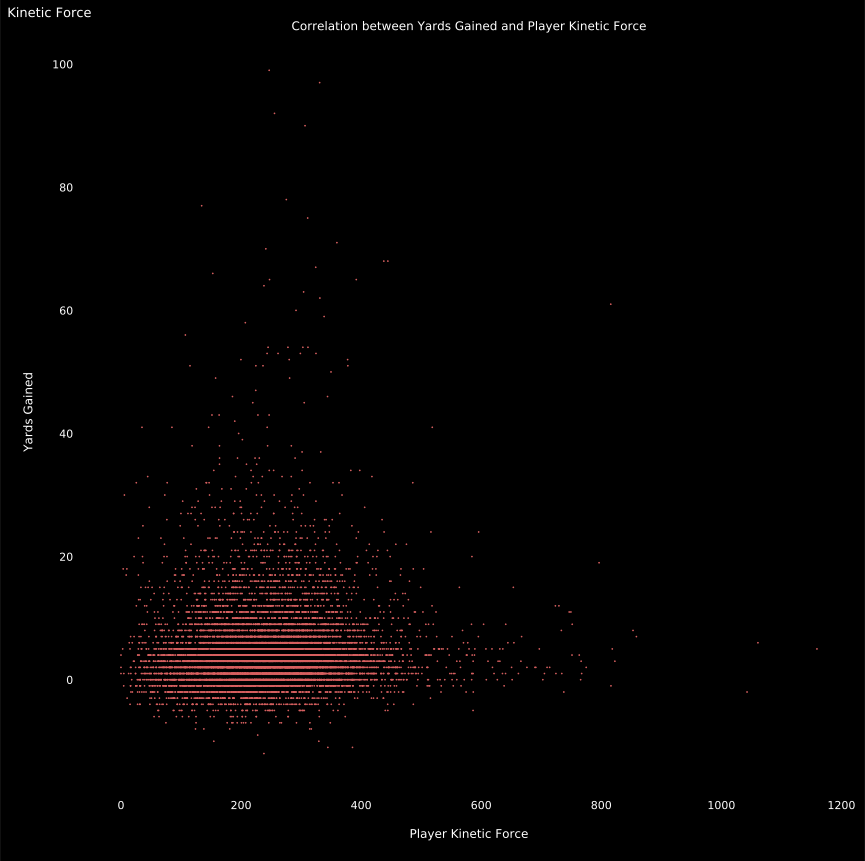

In [26]:

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12,12))




ttt = bbb[bbb.Position.isin(['RB','WR','HB'])]

ttt['kg']=ttt["PlayerWeight"] * 0.45359237
ttt['Force_Newtons']=ttt['kg'] * ttt['A'] * 0.9144
tips = ttt[['Force_Newtons', 'Yards']]

sns.scatterplot(x="Force_Newtons", y="Yards", data=tips, s=1, ax=ax, color='r', markers='o', edgecolor='r')
#sns.lmplot(x="Force_Newtons", y="Yards", data=tips)

plt.title('Correlation between Yards Gained and Player Kinetic Force',fontsize=12)
plt.suptitle('Kinetic Force',fontsize=13, x=0, y=1,ha="left")
##plt.text(x=4.7, y=14.7, s='Sepal Length vs Width', fontsize=10, weight='bold')

ax.set(xlabel="\nPlayer Kinetic Force\n")
ax.set(ylabel="Yards Gained\n")

sns.despine(top=True, right=True, left=True, bottom=True)


# dff = tf[tf.DefendersInTheBox>2]
# dff.DefendersInTheBox = dff.DefendersInTheBox.astype('int')

# flierprops = dict(markerfacecolor='0.75', 
#                   markersize=1,
#                   linestyle='none')

# fig, ax = plt.subplots(figsize=(9,7))
# ax.set_ylim(-7, 23)
# ax.set_title('Yards Gained vs number of Defenders in the box\n\n', fontsize=12)
# sns.boxplot(x='DefendersInTheBox',
#             y='Yards',
#             data=dff,
#             ax=ax,
#             showfliers=False , 
#             #color='blue'
#             )
#             #flierprops=flierprops)
# #Completely hide tick markers...
# ax.yaxis.set_major_locator(plt.NullLocator())
# ax.xaxis.set_major_formatter(plt.NullFormatter())

# ax.yaxis.grid(False)   # Show the horizontal gridlines
# ax.xaxis.grid(False)  # Hide x-axis gridlines 

# ax.yaxis.set_major_locator(plt.MultipleLocator(1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(5))

# # Add transparency to colors
# for patch in ax.artists:
#   r, g, b, a = patch.get_facecolor()
#   patch.set_facecolor((r, g, b, .3))
    
# # ax.set(xlabel=''common xlabel', ylabel='common ylabel', title='some title')
# ax.set(xlabel="\nNumber of defensive players in the 'Box'\n\n")
# # ax.set_xticklabels(['1Q', '2Q', '3Q', '4Q', '5Q'])

# # plt.title('My subtitle',fontsize=16)
# # plt.suptitle('My title',fontsize=24, x=0, y=1,ha="left")
# # plt.text(x=4.7, y=4.7, s='Sepal Length vs Width', fontsize=16, weight='bold')
# # plt.text(x=4.7, y=4.6, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75)

# plt.tight_layout()
# plt.show();

plt.tight_layout()
plt.show();

# PLOT THE RAW RUNNER WEIGHT ? 

<br>

<div class="h3" style="text-align: center">Some Observations:</div>


* The probability of the defensive end (DE) or defensive tackle (DT) picking up the ball on a fumble and running with are extremely rare, only happened three times total in two seasons...
* The vast majority of runs were via the running back (RB), followed by the wide receiver (WR), and the half back (HB)
* Some data that would help in the future to create an even better predictive model:
  * **z-coordinate** data (center of gravity, as well as shoulder height)
  * Player 'Heart' factor (otherwise known as the $D\alpha\kappa$-factor)

<br><br>

<div class="h4"><i><u>About Me:</u></i></div>
* Master's student in Applied Data Science at the University of Michigan 
* Background:  Bachelors in Applied Physics, Masters in Electrical Engineering (Communication Systems)
* [My Linkedin Profile](https://www.linkedin.com/in/tombresee/)
* Strong Tufte proponent
* Played rugby in college (Texas) under Coach Bob Macnab
* Played high school football at Seattle's [O'Dea High School](https://www.odea.org/athletics/fall-sports/football/)
  * I wore jersey #52 and I was ok but not like amazing
  * But what is amazing is the [history](https://www.odea.org/athletics/fall-sports/football/) of this powerhouse Seattle football program, currently ranked **#1** in the state of Washington (after beating the No. 11 team in the country as ranked by MaxPreps.com):
  <img src="https://github.com/tombresee/Temp/raw/master/ENTER/odearesp.png" width="1100px">
  <img src="https://github.com/tombresee/Temp/raw/master/ENTER/stateapp.png" width="600px">

* This is my first ever Kaggle submission, let's see how it goes...**upvotes are much appreciated and help to keep me motivated !** 


<div class="h5" style="text-align: center"><i>**Status:** still in progress, stay tuned for more updates</ul></div>


<br><br><br><br>

Appendix A: 

Appendix B:  &ensp; RecordLocator I created 

In [27]:
rl

Mapper
0                   GameId
1                   PlayId
2                     Team
3                        X
4                        Y
5                        S
6                        A
7                      Dis
8              Orientation
9                      Dir
10                   NflId
11             DisplayName
12            JerseyNumber
13                  Season
14                YardLine
15                 Quarter
16               GameClock
17          PossessionTeam
18                    Down
19                Distance
20           FieldPosition
21     HomeScoreBeforePlay
22  VisitorScoreBeforePlay
23             NflIdRusher
24        OffenseFormation
25        OffensePersonnel
26       DefendersInTheBox
27        DefensePersonnel
28           PlayDirection
29             TimeHandoff
30                TimeSnap
31                   Yards
32            PlayerHeight
33            PlayerWeight
34         PlayerBirthDate
35       PlayerCollegeName
36                Position
37            HomeTeamAbbr
38         VisitorTeamAbbr
39                    Week
40                 Stadium
41                Location
42             StadiumType
43                    Turf
44             GameWeather
45             Temperature
46                Humidity
47               WindSpeed
48           WindDirection

Appendix C:  &ensp; One Random Entire Play of Data (22 points of data, where each player on both offense and defense is shown))
* The rows are spread over three sections for clarity

In [28]:
df.iloc[0:22:,0:20]

GameId          PlayId  Team      X      Y     S     A   Dis  \
0   2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1   2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2   2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3   2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4   2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   
5   2017090700  20170907000118  away  75.06  24.00  1.01  0.32  0.18   
6   2017090700  20170907000118  away  74.11  16.64  1.11  0.83  0.02   
7   2017090700  20170907000118  away  73.37  18.73  1.24  0.74  0.13   
8   2017090700  20170907000118  away  56.63  26.90  0.26  1.86  0.28   
9   2017090700  20170907000118  away  73.35  38.83  4.55  0.76  0.51   
10  2017090700  20170907000118  away  74.15  28.90  0.72  0.73  0.01   
11  2017090700  20170907000118  home  75.82  17.56  2.30  1.39  0.55   
12  2017090700  20170907000118  home  74.78  33.21  1.71  0.82  0.19   
13  2017090700  20170907000118  home  75.43  32.41  1.50  1.36  0.32   
14  2017090700  20170907000118  home  75.90  25.12  1.38  0.80  0.19   
15  2017090700  20170907000118  home  79.76  29.49  0.84  1.22  0.00   
16  2017090700  20170907000118  home  76.47  36.91  5.15  0.77  0.59   
17  2017090700  20170907000118  home  74.70  19.19  2.10  1.48  0.51   
18  2017090700  20170907000118  home  78.75  30.53  3.63  3.35  0.38   
19  2017090700  20170907000118  home  74.60  31.88  1.86  1.51  0.17   
20  2017090700  20170907000118  home  74.58  29.12  1.00  0.69  0.22   
21  2017090700  20170907000118  home  74.58  28.47  1.70  1.55  0.24   

    Orientation     Dir    NflId        DisplayName  JerseyNumber  Season  \
0         81.99  177.18   496723         Eric Berry            29    2017   
1         27.61  198.70  2495116       Allen Bailey            97    2017   
2          3.01  202.73  2495493     Justin Houston            50    2017   
3        359.77  105.64  2506353    Derrick Johnson            56    2017   
4         12.63  164.31  2530794         Ron Parker            38    2017   
5        308.34   95.01  2543494           Dee Ford            55    2017   
6        357.23  322.59  2543637  Terrance Mitchell            39    2017   
7        328.52  270.04  2543851     Phillip Gaines            23    2017   
8        344.70   55.31  2550257    Daniel Sorensen            49    2017   
9         75.47  190.84  2552488      Marcus Peters            22    2017   
10       342.58  274.14  2556369        Chris Jones            95    2017   
11       178.97  284.15     2649     Danny Amendola            80    2017   
12       178.82  215.90   497240     Rob Gronkowski            87    2017   
13       207.08  222.76  2495131      Marcus Cannon            61    2017   
14       133.01  198.55  2495232        Nate Solder            77    2017   
15       192.18  110.86  2504211          Tom Brady            12    2017   
16       112.02  195.09  2530515        Chris Hogan            15    2017   
17       152.14  278.52  2543498      Brandin Cooks            14    2017   
18       161.98  245.74  2543773        James White            28    2017   
19       218.49  267.32  2552563         Shaq Mason            69    2017   
20       169.36  242.05  2553632      David Andrews            60    2017   
21       207.09  255.67  2555281         Joe Thuney            62    2017   

    YardLine  Quarter GameClock PossessionTeam  Down  Distance  
0         35        1  14:14:00             NE     3         2  
1         35        1  14:14:00             NE     3         2  
2         35        1  14:14:00             NE     3         2  
3         35        1  14:14:00             NE     3         2  
4         35        1  14:14:00             NE     3         2  
5         35        1  14:14:00             NE     3         2  
6         35        1  14:14:00             NE     3         2  
7         35        1  14:14:00             NE     3       

In [29]:
df.iloc[0:22,21:33]

HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher OffenseFormation  \
0                     0                       0      2543773          SHOTGUN   
1                     0                       0      2543773          SHOTGUN   
2                     0                       0      2543773          SHOTGUN   
3                     0                       0      2543773          SHOTGUN   
4                     0                       0      2543773          SHOTGUN   
5                     0                       0      2543773          SHOTGUN   
6                     0                       0      2543773          SHOTGUN   
7                     0                       0      2543773          SHOTGUN   
8                     0                       0      2543773          SHOTGUN   
9                     0                       0      2543773          SHOTGUN   
10                    0                       0      2543773          SHOTGUN   
11                    0                       0      2543773          SHOTGUN   
12                    0                       0      2543773          SHOTGUN   
13                    0                       0      2543773          SHOTGUN   
14                    0                       0      2543773          SHOTGUN   
15                    0                       0      2543773          SHOTGUN   
16                    0                       0      2543773          SHOTGUN   
17                    0                       0      2543773          SHOTGUN   
18                    0                       0      2543773          SHOTGUN   
19                    0                       0      2543773          SHOTGUN   
20                    0                       0      2543773          SHOTGUN   
21                    0                       0      2543773          SHOTGUN   

    OffensePersonnel  DefendersInTheBox  DefensePersonnel PlayDirection  \
0   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
1   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
2   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
3   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
4   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
5   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
6   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
7   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
8   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
9   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
10  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
11  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
12  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
13  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
14  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
15  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
16  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
17  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
18  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
19  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
20  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
21  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   

                 TimeHandoff                  TimeSnap  Yards PlayerHeight  
0   2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-0  
1   2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3  
2   2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3  
3   2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3  
4   2017-09-08T00:44:06.000Z 

In [30]:
df.iloc[0:22:,34:49]

PlayerBirthDate     PlayerCollegeName Position HomeTeamAbbr  \
0       12/29/1988             Tennessee       SS           NE   
1       03/25/1989                 Miami       DE           NE   
2       01/21/1989               Georgia       DE           NE   
3       11/22/1982                 Texas      ILB           NE   
4       08/17/1987              Newberry       FS           NE   
5       03/19/1991                Auburn       DE           NE   
6       05/17/1992                Oregon       CB           NE   
7       04/04/1991                  Rice       CB           NE   
8       03/05/1990         Brigham Young       SS           NE   
9       01/09/1993            Washington       CB           NE   
10      07/03/1994     Mississippi State       DT           NE   
11      11/02/1985            Texas Tech       WR           NE   
12      05/14/1989               Arizona       TE           NE   
13      05/06/1988       Texas Christian        T           NE   
14      04/12/1988              Colorado        T           NE   
15      08/03/1977              Michigan       QB           NE   
16      10/24/1987       Monmouth (N.J.)       WR           NE   
17      09/25/1993          Oregon State       WR           NE   
18      02/03/1992             Wisconsin       RB           NE   
19      08/28/1993          Georgia Tech        G           NE   
20      07/10/1992               Georgia        C           NE   
21      11/18/1992  North Carolina State        G           NE   

   VisitorTeamAbbr  Week           Stadium        Location StadiumType  \
0               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
1               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
2               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
3               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
4               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
5               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
6               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
7               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
8               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
9               KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
10              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
11              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
12              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
13              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
14              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
15              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
16              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
17              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
18              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
19              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
20              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
21              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   

          Turf     GameWeather  Temperature  Humidity WindSpeed WindDirection  
0   Field Turf  Clear and warm         63.0      77.0         8            SW  
1   Field Turf  Clear and warm         63.0      77.0         8            SW  
2   Field Turf  Clear and warm         63.0      77.0         8            SW  
3   Field Turf  Clear and warm         63.0      77.0         8            SW  
4   Field Turf  Clear and warm         63.0      77.0         8            SW  
5   Field Turf  Clear and warm         63.0      77.0         8            SW  
6   Field Turf  Clear and warm         63.0      77.0         8            SW  
7   Field Turf  Clear and warm         63.0      77.0         8            SW  
8   Field Turf  Clear and warm         63.0      77.0        

Appendix D:  Player Profile Function Generator

In [31]:

def find(player):
    plyr = dontbreak.loc[:,['DisplayName',
                                      'Position',
                                      'JerseyNumber',
                                      'PlayerWeight',
                                      'PlayerHeight',
                                      'PlayerBirthDate',
                                      'NflId',
                                      'PlayerCollegeName']].drop_duplicates()
    output = plyr[plyr.DisplayName==str(player)]
    return output

find('Tom Brady') # enter whatever name you want 


DisplayName Position  JerseyNumber  PlayerWeight PlayerHeight  \
15   Tom Brady       QB            12           225          6-4   

   PlayerBirthDate    NflId PlayerCollegeName  
15      08/03/1977  2504211          Michigan

In [32]:
# dontbreak.PlayerCollegeName.unique()
# ['Tennessee', 'Miami', 'Georgia', 'Texas', 'Newberry', 'Auburn',
#        'Oregon', 'Rice', 'Brigham Young', 'Washington',
#        'Mississippi State', 'Texas Tech', 'Arizona', 'Texas Christian',
#        'Colorado', 'Michigan', 'Monmouth (N.J.)', 'Oregon State',
#        'Wisconsin', 'Georgia Tech', 'North Carolina State',
#        'Central Michigan', 'LSU', 'Southern Mississippi', 'Brown',
#        'Clemson', 'Florida', 'Utah', 'California', 'Cincinnati',
#        'Wisconsin-Milwaukee', 'McGill', 'South Dakota State', 'Missouri',
#        'Penn State', 'Toledo', 'Rutgers', 'Alabama', 'South Carolina',
#        'West Alabama', 'Arkansas', 'Stanford', 'Nebraska', 'Connecticut',
#        'Georgia State', 'Arizona State', 'Houston', 'Pittsburgh', 'UCLA',
#        'Minnesota', 'Vanderbilt', 'Abilene Christian', 'Chattanooga',
#        'Temple', 'Troy', 'Arkansas State', 'Louisiana State',
#        'Florida State', 'Southern California', 'Ohio State', 'Louisville',
#        'Tulsa', 'Virginia Tech', 'Louisiana Tech', 'East Carolina',
#        'Columbia', 'USC', 'Hillsdale', 'Coastal Carolina',
#        'Colorado State-Pueblo', 'Wagner', 'West Georgia',
#        'Sam Houston State', 'Southern Methodist', 'Kent State',
#        'Stony Brook', 'Southern Arkansas', 'North Dakota State',
#        'Iowa State', 'Iowa', 'Wyoming', 'Tulane', 'Bethune-Cookman',
#        'North Carolina', 'Boston College', 'Valdosta State', 'Texas A&M',
#        'San Jose State', 'Texas-El Paso', 'Mary Hardin-Baylor',
#        'Kentucky', 'Regina, Can.', 'Indiana', 'Drake', 'Memphis',
#        'Southeastern Louisiana', 'Purdue', 'Central Florida',
#        'Nebraska-Omaha', 'South Dakota', 'Mississippi', 'Michigan State',
#        'Boise State', 'West Virginia', 'Kansas State', 'Baylor',
#        'North Carolina A&T', 'Ashland', 'San Diego State', 'Citadel',
#        'Grand Valley State', 'Nicholls State', 'Oklahoma',
#        'Missouri Southern', 'Virginia', 'Notre Dame', 'Delaware',
#        'Northern Iowa', 'Towson', 'Duke', 'Illinois', 'Utah State',
#        'Maine', 'Chadron State', 'Portland State', 'Samford',
#        'Wake Forest', 'Tennessee State', 'Ohio U.',
#        'South Carolina State', 'Maryland', 'Cornell', 'Nevada',
#        'Alabama State', 'Princeton', 'Miami (Fla.)', 'James Madison',
#        'Miami (Ohio)', 'Army', 'Oklahoma State', 'Florida Atlantic',
#        'Georgia Southern', 'Montana', 'North Carolina-Charlotte', 'Idaho',
#        'Pittsburg State', 'New Mexico', 'Presbyterian', 'Syracuse',
#        'Eastern Michigan', 'California-Irvine', 'Howard',
#        'Northern Illinois', 'Nevada-Las Vegas', 'Southern Utah',
#        'Alabama-Birmingham', 'Delaware State', 'Appalachian State',
#        'Tiffin University', 'Kentucky Wesleyan', 'Missouri State',
#        'Northwestern (Ia)', 'Fresno State', 'Florida International',
#        'Middle Tennessee', 'Buffalo', 'Ohio', 'Colorado State',
#        'Ouachita Baptist', 'Central Missouri', 'Marshall',
#        'Middle Tennessee State', 'Western Michigan', 'Western Kentucky',
#        'Greenville', 'Miami, O.', 'Stillman', 'South Florida',
#        'New Hampshire', 'Washington State', 'Texas State',
#        'South Alabama', 'Louisiana Coll.', 'Mars Hill', 'West Texas A&M',
#        'Northwest Missouri State', 'Eastern Washington', 'Beloit',
#        'New Mexico State', 'Bloomsburg', 'Missouri Western State',
#        'Northwestern', 'Mount Union', 'Slippery Rock', 'Harvard',
#        'Canisius', 'North Alabama', 'William Penn',
#        'Saginaw Valley State', 'Bowling Green State', 'Richmond',
#        'Texas-San Antonio', 'Idaho State', 'Shippensburg',
#        'Michigan Tech', 'Minn. State-Mankato', 'Manitoba, Can.',
#        'Augustana, S.D.', 'North Texas', 'Akron', 'Western Oregon',
#        'Kansas', 'Illinois State', 'Sacramento State',
#        'Missouri Southern State', 'Bucknell', 'Midwestern State',
#        'Albany State, Ga.', 'Grambling State', 'Azusa Pacific', 'Hobart',
#        'Hampton', 'Eastern Kentucky', 'William & Mary',
#        'Southern Illinois', 'Henderson State', 'Winston-Salem State',
#        'Furman', 'Monmouth, N.J.', 'Louisiana-Lafayette', 'Villanova',
#        'Washburn', 'Northwestern State-Louisiana', 'Air Force',
#        'St. Francis (PA)', 'Lindenwood', 'North Carolina Central',
#        'Belhaven', 'Marist', 'Western State, Colo.', 'California, Pa.',
#        'Marian (Ind.)', 'Laval, Can.', 'Massachusetts',
#        'Youngstown State', 'Arkansas-Pine Bluff', 'Ball State',
#        'Grambling', 'Bowie State', 'Montana State', 'Jacksonville State',
#        'Alabama A&M', 'Eastern Oregon', 'Wofford', 'Eastern Illinois',
#        'Lamar', 'San Diego', 'North Greenville', 'Pennsylvania',
#        'Holy Cross', 'Old Dominion', 'Liberty', 'Shepherd',
#        'Ferris State', 'Cal Poly', 'Stetson', 'Northeast Mississippi CC',
#        'Jacksonville', 'Hawaii', 'East Central', 'Yale', 'Weber State',
#        'Incarnate Word (Tex.)', 'Limestone', 'Tennessee-Chattanooga',
#        'Assumption', 'Concordia-St. Paul', 'Fordham', 'Fort Hays State',
#        'Virginia State', 'Stephen F. Austin St.', 'Western Carolina',
#        'Concordia, Minn', 'Navy', 'No College', 'Virginia Commonwealth',
#        'Central Arkansas', 'Alcorn State', 'Albany', 'Prairie View',
#        'Wis.-Platteville', 'Indiana State', 'Southern University',
#        'Western Illinois', 'Southeast Missouri', 'Frostburg State',
#        'Humboldt State', 'Wisconsin-Whitewater', 'Arkansas-Monticello',
#        'Southern Connecticut State', 'Texas Southern'], dtype=object)

# def create_football_field(linenumbers=False,
#                           endzones=False,
#                           highlight_line=False,
#                           highlight_line_number=50,
#                           highlighted_name='Line of Scrimmage',
#                           fifty_is_los=False,
#                           figsize=(7, 4)):
#     rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.2,
#                              edgecolor='r', facecolor='green', zorder=0,  alpha=0.5)
#     fig, ax = plt.subplots(1, figsize=figsize)
#     ax.add_patch(rect)
#     plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
#               80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
#              [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
#               53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
#              color='white')
#     plt.xlim(0, 120)
#     plt.ylim(-5, 58.3)
#     plt.axis('off')
#     return fig, ax
# create_football_field(); 


# df.groupby('PlayId') \
#       .last() \
#       .groupby('OffensePersonnel') \
#       .count()['GameId'] \
#       .sort_values(ascending=False)
# #     .head(15) \
# #     .sort_values()

In [33]:
###########################bbb.groupby(['A', 'Position']).size().sort_values()